In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required libraries
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Set up plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully")
print(f"Polars version: {pl.__version__}")

Libraries imported successfully
Polars version: 1.31.0


In [3]:
import zipfile
import os

zip_file_path = "/content/drive/MyDrive/DATASET/Encrypted Traffic Feature Dataset for Machine Learning and Deep Learning based Encrypted Traffic Analysis.zip"
extraction_path = "/content/unzipped_data"

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

print(f"Unzipping '{zip_file_path}' to '{extraction_path}'...")

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Unzipping complete!")
print(f"Contents extracted to: {extraction_path}")

# List the contents of the extracted directory to verify
print("\nContents of extracted directory:")
for root, dirs, files in os.walk(extraction_path):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

Unzipping '/content/drive/MyDrive/DATASET/Encrypted Traffic Feature Dataset for Machine Learning and Deep Learning based Encrypted Traffic Analysis.zip' to '/content/unzipped_data'...
Unzipping complete!
Contents extracted to: /content/unzipped_data

Contents of extracted directory:
/content/unzipped_data/Encrypted Traffic Feature Dataset for Machine Learning and Deep Learning based Encrypted Traffic Analysis
/content/unzipped_data/Encrypted Traffic Feature Dataset for Machine Learning and Deep Learning based Encrypted Traffic Analysis/packet_based_dataset.csv
/content/unzipped_data/Encrypted Traffic Feature Dataset for Machine Learning and Deep Learning based Encrypted Traffic Analysis/session_based_dataset.csv
/content/unzipped_data/Encrypted Traffic Feature Dataset for Machine Learning and Deep Learning based Encrypted Traffic Analysis/details of the composed traffic dataset.xlsx
/content/unzipped_data/Encrypted Traffic Feature Dataset for Machine Learning and Deep Learning based En

In [4]:
# Define file paths
train_dir = Path("/content/unzipped_data/Encrypted Traffic Feature Dataset for Machine Learning and Deep Learning based Encrypted Traffic Analysis/Train Set")
test_dir = Path("/content/unzipped_data/Encrypted Traffic Feature Dataset for Machine Learning and Deep Learning based Encrypted Traffic Analysis/Test Set")

# Load datasets using Polars with GPU acceleration (if available)
# Polars will automatically use GPU if polars-gpu is installed

print("Loading datasets...")

# Load training sets
packet_train = pl.read_csv(train_dir / "packet_based_trainset.csv")
session_train = pl.read_csv(train_dir / "session_based_trainset.csv")

# Load test sets
packet_test = pl.read_csv(test_dir / "packet_based_testset.csv")
session_test = pl.read_csv(test_dir / "session_based_testset.csv")

print("All datasets loaded successfully!\n")

# Display basic information
print("=" * 70)
print("DATASET SHAPES")
print("=" * 70)
print(f"Packet-based Training Set: {packet_train.shape}")
print(f"Session-based Training Set: {session_train.shape}")
print(f"Packet-based Test Set: {packet_test.shape}")
print(f"Session-based Test Set: {session_test.shape}")
print("=" * 70)

Loading datasets...
All datasets loaded successfully!

DATASET SHAPES
Packet-based Training Set: (4435304, 25)
Session-based Training Set: (488524, 280)
Packet-based Test Set: (1108968, 25)
Session-based Test Set: (122132, 280)


In [5]:
# Explore Packet-based Training Set
print("PACKET-BASED TRAINING SET")
print("\nFirst 5 rows:")
display(packet_train.head())
print("\nColumn names and types:")
print(packet_train.schema)
print("\nBasic statistics:")
display(packet_train.describe())

PACKET-BASED TRAINING SET

First 5 rows:


Time_cost,Flag_of_packets,Traffic_sequence,Payload_ratio,Length_of_IP_packets,Length_of_TCP_payload,Length_of_TCP_packet_header,Length_of_IP_packet_header,TCP_windows_size_value,Length_of_TCP_segment(packet),Time_difference_between_packets_per_session,Change_values_of_TCP_windows_length_per_session,Interval_of_arrival_time_of_forward_traffic,Interval_of_arrival_time_of_backward_traffic,Time_to_live,Ratio_to_previous_packets_in_each_session,Source_port,Destination_port,source_IP_address,Destination_IP_address,inter_arrival_time_of_forward_traffic_enc,inter_arrival_time_of_backward_traffic_enc,ratio_to_previous_packet_enc,label,unique_link_mark
f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,f64,i64,f64,f64,i64,f64,i64,i64,str,str,f64,f64,f64,i64,i64
3.1958e6,24,360828843,0.6875,128,88,20,20,64240,108,0.000227,0,0.000227,0.0,128,3.2,51561,443,"""10.0.2.105""","""195.113.214.251""",0.0,0.0,0.0,1,6043858606213562857
3.1958e6,24,1285282818,0.789474,190,150,20,20,65535,170,0.014838,0,0.0,0.014838,64,4.75,51561,443,"""10.0.2.105""","""195.113.214.251""",0.0,0.0,1.484375,1,6043858606213562857
3.1958e6,24,360828931,0.63964,111,71,20,20,64090,91,0.000598,-1445,0.015487,0.0,128,0.584211,51561,443,"""10.0.2.105""","""195.113.214.251""",0.015487,0.0,0.584211,1,6043858606213562857
3.1958e6,24,360829002,0.889197,361,321,20,20,64090,341,0.002237,-1445,0.002297,0.0,128,9.025,51561,443,"""10.0.2.105""","""195.113.214.251""",0.002297,0.0,3.252252,1,6043858606213562857
3.1958e6,16,1285282968,0.972603,1460,1420,20,20,65535,1440,0.135858,0,0.0,0.135858,64,36.5,51561,443,"""10.0.2.105""","""195.113.214.251""",0.0,0.138821,4.044321,1,6043858606213562857



Column names and types:
Schema({'Time_cost': Float64, 'Flag_of_packets': Int64, 'Traffic_sequence': Int64, 'Payload_ratio': Float64, 'Length_of_IP_packets': Int64, 'Length_of_TCP_payload': Int64, 'Length_of_TCP_packet_header': Int64, 'Length_of_IP_packet_header': Int64, 'TCP_windows_size_value': Int64, 'Length_of_TCP_segment(packet)': Int64, 'Time_difference_between_packets_per_session': Float64, 'Change_values_of_TCP_windows_length_per_session': Int64, 'Interval_of_arrival_time_of_forward_traffic': Float64, 'Interval_of_arrival_time_of_backward_traffic': Float64, 'Time_to_live': Int64, 'Ratio_to_previous_packets_in_each_session': Float64, 'Source_port': Int64, 'Destination_port': Int64, 'source_IP_address': String, 'Destination_IP_address': String, 'inter_arrival_time_of_forward_traffic_enc': Float64, 'inter_arrival_time_of_backward_traffic_enc': Float64, 'ratio_to_previous_packet_enc': Float64, 'label': Int64, 'unique_link_mark': Int64})

Basic statistics:


statistic,Time_cost,Flag_of_packets,Traffic_sequence,Payload_ratio,Length_of_IP_packets,Length_of_TCP_payload,Length_of_TCP_packet_header,Length_of_IP_packet_header,TCP_windows_size_value,Length_of_TCP_segment(packet),Time_difference_between_packets_per_session,Change_values_of_TCP_windows_length_per_session,Interval_of_arrival_time_of_forward_traffic,Interval_of_arrival_time_of_backward_traffic,Time_to_live,Ratio_to_previous_packets_in_each_session,Source_port,Destination_port,source_IP_address,Destination_IP_address,inter_arrival_time_of_forward_traffic_enc,inter_arrival_time_of_backward_traffic_enc,ratio_to_previous_packet_enc,label,unique_link_mark
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64
"""count""",4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,"""4435304""","""4435304""",4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0
"""mean""",7.1108e8,22.014023,2.0705e9,0.814498,679.380277,637.840849,21.539427,20.0,19928.097868,659.380277,0.926599,1.0154e9,0.318733,0.753049,97.012729,9.01361,52715.225852,715.89711,null,null,1.101061,1.146991,1.799248,0.417566,4.6112e18
"""std""",7.5675e8,3.472292,1.2423e9,0.191087,623.968649,624.046184,4.013947,0.0,27078.013245,623.968649,9.535791,2.1384e12,5.43329,8.512394,52.57193,13.029299,12338.59956,2792.563924,null,null,11.607375,13.063827,3.13405,0.493158,2.6644e18
"""min""",24.55013,16.0,1051.0,0.018868,41.0,1.0,20.0,20.0,1.0,21.0,-0.000012,-65525.0,0.0,0.0,10.0,0.0,22.0,22.0,"""10.0.0.45""","""1.1.1.1""",0.0,0.0,0.0,0.0,1.1555e12
"""25%""",282476.122357,24.0,9.82875485e8,0.71831,150.0,107.0,20.0,20.0,237.0,130.0,0.000095,0.0,0.0,0.0,64.0,1.0,51007.0,443.0,null,null,0.0,0.0,0.302128,0.0,2.3038e18
"""50%""",3.1958e6,24.0,2.0358e9,0.895013,385.0,342.0,20.0,20.0,319.0,365.0,0.000806,0.0,0.0,0.00003,64.0,3.2,54774.0,443.0,null,null,0.0,9.5367e-7,0.998,0.0,4.6083e18
"""75%""",1.4991e9,24.0,3.1361e9,0.972222,1460.0,1420.0,20.0,20.0,40716.0,1440.0,0.024436,0.0,0.000523,0.00375,128.0,9.868421,59061.0,443.0,null,null,0.000144,0.001061,1.508706,1.0,6.9183e18
"""max""",1.5790e9,152.0,4.2950e9,0.998584,28240.0,28200.0,44.0,20.0,65535.0,28220.0,2319.384045,4.5036e15,2319.384045,1680.020609,250.0,706.0,65534.0,60986.0,"""95.172.94.62""","""99.86.59.41""",2332.462864,1680.020609,212.820513,1.0,9.2234e18


In [6]:
# Explore Session-based Training set
print("SESSION-BASED TRAINING SET")
print("\nFirst 5 rows:")
display(session_train.head())
print("\nColumn names and types:")
print(session_train.schema)
print("\nBasic statistics:")
session_train.describe()

SESSION-BASED TRAINING SET

First 5 rows:


Total_length_of_IP_packet_per_session,Total_Time_to_live_per_session,The_times_of_change_of_TCP_windows_length,The_times_of_change_of_payload_per_session,Total_length_of_forward_payload,Total_length_of_backward_payload,Total_length_of_forward_IP_header,Total_length_of_backward_IP_header,Total_length_of_forward_TCP_header,Total_length_of_backward_TCP_header,Total_length_of_forward_TCP_segment(packet),Total_length_of_backward_TCP_segment(packet),flow duration,No_of_forward_packets,No_of_backward_packets,Bytes_From_Clients(IPpacket),Bytes_From_Servers(IPpacket),mean_Length_of_IP_packets,median_Length_of_IP_packets,max_Length_of_IP_packets,min_Length_of_IP_packets,std_Length_of_IP_packets,var_Length_of_IP_packets,mean_Length_of_TCP_payload,median_Length_of_TCP_payload,max_Length_of_TCP_payload,min_Length_of_TCP_payload,std_Length_of_TCP_payload,var_Length_of_TCP_payload,mean_Length_of_TCP_packet_header,median_Length_of_TCP_packet_header,max_Length_of_TCP_packet_header,min_Length_of_TCP_packet_header,std_Length_of_TCP_packet_header,var_Length_of_TCP_packet_header,mean_Length_of_IP_packet_header,median_Length_of_IP_packet_header,…,max_ttl_backward_traffic_ratio,min_ttl_backward_traffic_ratio,var_ttl_backward_traffic_ratio,median_ttl_backward_traffic_ratio,total_TCP_windows_size_value_forward_traffic_ratio,std_TCP_windows_size_value_forward_traffic_ratio,mean_TCP_windows_size_value_forward_traffic_ratio,max_TCP_windows_size_value_forward_traffic_ratio,min_TCP_windows_size_value_forward_traffic_ratio,var_TCP_windows_size_value_forward_traffic_ratio,median_TCP_windows_size_value_forward_traffic_ratio,total_TCP_windows_size_valuel_backward_traffic_ratio,std_TCP_windows_size_value_backward_traffic_ratio,mean_TCP_windows_size_value_backward_traffic_ratio,max_TCP_windows_size_value_backward_traffic_ratio,min_TCP_windows_size_value_backward_traffic_ratio,var_TCP_windows_size_value_backward_traffic_ratio,median_TCP_windows_size_value_backward_traffic_ratio,Total_length_of_IP_packet_ratio,max_length_of_IP_packet_ratio,min_length_of_IP_packet_ratio,var_length_of_IP_packet_ratio,std_length_of_IP_packet_ratio,meidan_length_of_IP_packet_ratio,Total_Time_to_live_ratio,Total_length_of_forward_payload_ratio,Total_length_of_backward_payload_ratio,Total_length_of_forward_IP_header_ratio,Total_length_of_backward_IP_header_ratio,Total_length_of_forward_TCP_header_ratio,Total_length_of_backward_TCP_header_ratio,enc_ratio_of_forward_packets,enc_ratio_of_backward_packets,Total_length_of_forward_TCP_segment_ratio,Total_length_of_backward_TCP_segment_ratio,total_payload_per_session_ratio,IPratio_ratio
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,f64,f64,i64,i64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
10934,2150,12,13,678,9352,260,180,272,192,950,9544,18.550662,13,9,1210,9724,497.0,52.0,2849,40,746.123497,556700.2727,455.909091,0.0,2809,0,746.781817,557683.0826,21.090909,20.0,32,20,3.449757,11.900826,20.0,20.0,…,1.0,1.0,0.0,1.0,0.040003,0.0,0.173347,0.015625,0.0,0.0,1.0,0.029832,0.000088,0.038355,0.004456,1.0,7.7662e-9,1.0,0.953905,1.0,5.15,1.218197,1.10372,18.855769,0.354419,1.0,1.0,0.230769,0.777778,0.220588,0.729167,0.230769,0.777778,0.776842,0.994552,1.0,0.194175
7109,1854,23,22,596,4973,340,260,516,424,1112,5397,0.915471,17,13,1452,5657,236.966667,56.0,1500,40,428.116377,183283.6322,185.633333,0.0,1448,0,427.805913,183017.8989,31.333333,32.0,40,20,4.268749,18.222222,20.0,20.0,…,1.0,1.017241,0.0,1.0,0.057111,0.005875,0.161814,0.011712,0.0,0.000035,1.03605,0.014049,0.000117,0.026091,0.002106,1.0,1.3765e-8,0.967213,0.878464,1.0,2.075,1.73697,1.317941,3.732143,0.429881,1.0,1.0,0.352941,0.538462,0.372093,0.528302,0.352941,0.538462,0.708633,0.962942,1.0,0.481928
40003,3912,26,27,2645,35414,340,620,352,632,2997,36046,2.175286,17,31,3337,36666,833.395833,1029.0,1500,40


Column names and types:
Schema({'Total_length_of_IP_packet_per_session': Int64, 'Total_Time_to_live_per_session': Int64, 'The_times_of_change_of_TCP_windows_length': Int64, 'The_times_of_change_of_payload_per_session': Int64, 'Total_length_of_forward_payload': Int64, 'Total_length_of_backward_payload': Int64, 'Total_length_of_forward_IP_header': Int64, 'Total_length_of_backward_IP_header': Int64, 'Total_length_of_forward_TCP_header': Int64, 'Total_length_of_backward_TCP_header': Int64, 'Total_length_of_forward_TCP_segment(packet)': Int64, 'Total_length_of_backward_TCP_segment(packet)': Int64, 'flow duration': Float64, 'No_of_forward_packets': Int64, 'No_of_backward_packets': Int64, 'Bytes_From_Clients(IPpacket)': Int64, 'Bytes_From_Servers(IPpacket)': Int64, 'mean_Length_of_IP_packets': Float64, 'median_Length_of_IP_packets': Float64, 'max_Length_of_IP_packets': Int64, 'min_Length_of_IP_packets': Int64, 'std_Length_of_IP_packets': Float64, 'var_Length_of_IP_packets': Float64, 'mean_Le

statistic,Total_length_of_IP_packet_per_session,Total_Time_to_live_per_session,The_times_of_change_of_TCP_windows_length,The_times_of_change_of_payload_per_session,Total_length_of_forward_payload,Total_length_of_backward_payload,Total_length_of_forward_IP_header,Total_length_of_backward_IP_header,Total_length_of_forward_TCP_header,Total_length_of_backward_TCP_header,Total_length_of_forward_TCP_segment(packet),Total_length_of_backward_TCP_segment(packet),flow duration,No_of_forward_packets,No_of_backward_packets,Bytes_From_Clients(IPpacket),Bytes_From_Servers(IPpacket),mean_Length_of_IP_packets,median_Length_of_IP_packets,max_Length_of_IP_packets,min_Length_of_IP_packets,std_Length_of_IP_packets,var_Length_of_IP_packets,mean_Length_of_TCP_payload,median_Length_of_TCP_payload,max_Length_of_TCP_payload,min_Length_of_TCP_payload,std_Length_of_TCP_payload,var_Length_of_TCP_payload,mean_Length_of_TCP_packet_header,median_Length_of_TCP_packet_header,max_Length_of_TCP_packet_header,min_Length_of_TCP_packet_header,std_Length_of_TCP_packet_header,var_Length_of_TCP_packet_header,mean_Length_of_IP_packet_header,…,max_ttl_backward_traffic_ratio,min_ttl_backward_traffic_ratio,var_ttl_backward_traffic_ratio,median_ttl_backward_traffic_ratio,total_TCP_windows_size_value_forward_traffic_ratio,std_TCP_windows_size_value_forward_traffic_ratio,mean_TCP_windows_size_value_forward_traffic_ratio,max_TCP_windows_size_value_forward_traffic_ratio,min_TCP_windows_size_value_forward_traffic_ratio,var_TCP_windows_size_value_forward_traffic_ratio,median_TCP_windows_size_value_forward_traffic_ratio,total_TCP_windows_size_valuel_backward_traffic_ratio,std_TCP_windows_size_value_backward_traffic_ratio,mean_TCP_windows_size_value_backward_traffic_ratio,max_TCP_windows_size_value_backward_traffic_ratio,min_TCP_windows_size_value_backward_traffic_ratio,var_TCP_windows_size_value_backward_traffic_ratio,median_TCP_windows_size_value_backward_traffic_ratio,Total_length_of_IP_packet_ratio,max_length_of_IP_packet_ratio,min_length_of_IP_packet_ratio,var_length_of_IP_packet_ratio,std_length_of_IP_packet_ratio,meidan_length_of_IP_packet_ratio,Total_Time_to_live_ratio,Total_length_of_forward_payload_ratio,Total_length_of_backward_payload_ratio,Total_length_of_forward_IP_header_ratio,Total_length_of_backward_IP_header_ratio,Total_length_of_forward_TCP_header_ratio,Total_length_of_backward_TCP_header_ratio,enc_ratio_of_forward_packets,enc_ratio_of_backward_packets,Total_length_of_forward_TCP_segment_ratio,Total_length_of_backward_TCP_segment_ratio,total_payload_per_session_ratio,IPratio_ratio
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,…,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0,488524.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",37409.419009,5434.881255,29.683582,35.84863,1943.388902,33110.088602,426.271544,696.27572,487.974716,745.419525,2431

In [7]:
# Function to assess data quality
def assess_data_quality(df, dataset_name):
    print("=" * 70)
    print(f"DATA QUALITY ASSESSMENT: {dataset_name}")
    print("=" * 70)

    # Missing values
    null_counts = df.null_count()
    print("\nMissing Values:")
    print(null_counts)

    # Total missing percentage
    total_cells = df.shape[0] * df.shape[1]
    total_missing = null_counts.sum_horizontal()[0]
    missing_pct = (total_missing / total_cells) * 100 if total_cells > 0 else 0
    print(f"\nTotal Missing: {total_missing} ({missing_pct:.2f}%)")

    # Duplicates
    n_duplicates = df.shape[0] - df.unique().shape[0]
    print(f"Duplicate Rows: {n_duplicates}")

    # Data types
    print(f"\nData Types Distribution:")
    #dictionary
    dtypes = {}
    #going th each col & get datatype
    for col, dtype in df.schema.items():
        dtype_str = str(dtype)
        dtypes[dtype_str] = dtypes.get(dtype_str, 0) + 1
    for dtype, count in dtypes.items():
        print(f"  {dtype}: {count} columns")

    print("=" * 70)
    print()

# Assess all datasets
assess_data_quality(packet_train, "Packet-based Training Set")
assess_data_quality(session_train, "Session-based Training Set")
assess_data_quality(packet_test, "Packet-based Test Set")
assess_data_quality(session_test, "Session-based Test Set")

DATA QUALITY ASSESSMENT: Packet-based Training Set

Missing Values:
shape: (1, 25)
┌───────────┬────────────┬────────────┬────────────┬───┬───────────┬───────────┬───────┬───────────┐
│ Time_cost ┆ Flag_of_pa ┆ Traffic_se ┆ Payload_ra ┆ … ┆ inter_arr ┆ ratio_to_ ┆ label ┆ unique_li │
│ ---       ┆ ckets      ┆ quence     ┆ tio        ┆   ┆ ival_time ┆ previous_ ┆ ---   ┆ nk_mark   │
│ u32       ┆ ---        ┆ ---        ┆ ---        ┆   ┆ _of_backw ┆ packet_en ┆ u32   ┆ ---       │
│           ┆ u32        ┆ u32        ┆ u32        ┆   ┆ ard…      ┆ c         ┆       ┆ u32       │
│           ┆            ┆            ┆            ┆   ┆ ---       ┆ ---       ┆       ┆           │
│           ┆            ┆            ┆            ┆   ┆ u32       ┆ u32       ┆       ┆           │
╞═══════════╪════════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════╪═══════════╡
│ 0         ┆ 0          ┆ 0          ┆ 0          ┆ … ┆ 0         ┆ 0         ┆ 0     ┆ 0         │
└───────

In [8]:
# Check for target/label columns (common names: label, target, class, etc.)
def find_target_column(df):
    target_keywords = ['label', 'target', 'class', 'attack', 'category', 'type']
    for col in df.columns:
        if any(keyword in col.lower() for keyword in target_keywords):
            return col
    return None

# Analyze packet-based training set
packet_target = find_target_column(packet_train)
if packet_target:
    print("=" * 70)
    print(f"PACKET-BASED TRAINING SET - Target Variable: {packet_target}")
    print("=" * 70)

    # Value counts using Polars
    target_dist = packet_train.group_by(packet_target).agg(pl.count()).sort(packet_target)
    print("\nTarget Distribution:")
    print(target_dist)

    # Calculate percentages
    total = packet_train.shape[0]
    target_dist_pct = target_dist.with_columns (
        (pl.col('count') / total * 100).alias('percentage')
    )
    print("\nTarget Distribution (with percentages):")
    print(target_dist_pct)
else:
    print("No clear target column found in packet-based training set")
    print("Available columns:", packet_train.columns)

print("\n")

# Analyze session-based training set
session_target = find_target_column(session_train)
if session_target:
    print("=" * 70)
    print(f"SESSION-BASED TRAINING SET - Target Variable: {session_target}")
    print("=" * 70)

    target_dist = session_train.group_by(session_target).agg(pl.count()).sort(session_target)
    print("\nTarget Distribution:")
    print(target_dist)

    total = session_train.shape[0]
    target_dist_pct = target_dist.with_columns(
        (pl.col('count') / total * 100).alias('percentage')
    )
    print("\nTarget Distribution (with percentages):")
    print(target_dist_pct)
else:
    print("No clear target column found in session-based training set")
    print("Available columns:", session_train.columns)

PACKET-BASED TRAINING SET - Target Variable: label

Target Distribution:
shape: (2, 2)
┌───────┬─────────┐
│ label ┆ count   │
│ ---   ┆ ---     │
│ i64   ┆ u32     │
╞═══════╪═════════╡
│ 0     ┆ 2583272 │
│ 1     ┆ 1852032 │
└───────┴─────────┘

Target Distribution (with percentages):
shape: (2, 3)
┌───────┬─────────┬────────────┐
│ label ┆ count   ┆ percentage │
│ ---   ┆ ---     ┆ ---        │
│ i64   ┆ u32     ┆ f64        │
╞═══════╪═════════╪════════════╡
│ 0     ┆ 2583272 ┆ 58.243403  │
│ 1     ┆ 1852032 ┆ 41.756597  │
└───────┴─────────┴────────────┘


SESSION-BASED TRAINING SET - Target Variable: label

Target Distribution:
shape: (2, 2)
┌───────┬────────┐
│ label ┆ count  │
│ ---   ┆ ---    │
│ i64   ┆ u32    │
╞═══════╪════════╡
│ 0     ┆ 243054 │
│ 1     ┆ 245470 │
└───────┴────────┘

Target Distribution (with percentages):
shape: (2, 3)
┌───────┬────────┬────────────┐
│ label ┆ count  ┆ percentage │
│ ---   ┆ ---    ┆ ---        │
│ i64   ┆ u32    ┆ f64        │
╞═══════╪

In [9]:
# Preprocessing function using Polars
# Remove duplicates	Keeps only unique rows
# Handle missing data	Fills numeric nulls with median, categorical nulls with mode or "Unknown"
# Remove infinite values	Replaces ∞ with null, then fills with median
# Print summary	Shows shapes and stats for transparency
# Apply to all datasets	Cleans training & test sets

def preprocess_data(df, dataset_name):
    print(f"\nPreprocessing: {dataset_name}")
    print("-" * 70)

    original_shape = df.shape
    print(f"Original shape: {original_shape}")

    # 1. Remove duplicate rows
    df_clean = df.unique()
    duplicates_removed = original_shape[0] - df_clean.shape[0]
    print(f"Duplicates removed: {duplicates_removed}")

    # 2. Handle missing values
    # Get columns with missing values
    null_cols = []
    for col in df_clean.columns:
        if df_clean[col].null_count() > 0:
            null_cols.append(col)

    if null_cols:
        print(f"Columns with missing values: {len(null_cols)}")

        # Strategy: Fill numeric columns with median, categorical with mode
        for col in null_cols:
            dtype = df_clean[col].dtype

            if dtype in [pl.Float32, pl.Float64, pl.Int8, pl.Int16, pl.Int32, pl.Int64, pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64]:
                # Numeric: fill with median
                median_val = df_clean[col].median()
                df_clean = df_clean.with_columns(
                    pl.col(col).fill_null(median_val)
                )
            else:
                # Categorical: fill with mode or 'Unknown'
                mode_val = df_clean[col].mode().first()
                if mode_val is not None:
                    df_clean = df_clean.with_columns(
                        pl.col(col).fill_null(mode_val)
                    )
                else:
                    df_clean = df_clean.with_columns(
                        pl.col(col).fill_null("Unknown")
                    )
    else:
        print("No missing values found")

    # 3. Remove infinite values (for numeric columns)
    numeric_cols = [col for col in df_clean.columns
                   if df_clean[col].dtype in [pl.Float32, pl.Float64]]

    if numeric_cols:
        for col in numeric_cols:
            # Replace inf with null, then fill with median
            df_clean = df_clean.with_columns(
                pl.when(pl.col(col).is_infinite())
                .then(None)
                .otherwise(pl.col(col))
                .alias(col)
                #polars dnt know where to save thats why use alias function
            )

            # Fill any nulls created with median
            median_val = df_clean[col].median()
            if median_val is not None:
                df_clean = df_clean.with_columns(
                    pl.col(col).fill_null(median_val)
                )

    print(f"Final shape: {df_clean.shape}")
    print(f"Rows retained: {df_clean.shape[0]/original_shape[0]*100:.2f}%")
    print("-" * 70)

    return df_clean

# Preprocess all datasets
print("=" * 70)
print("DATA PREPROCESSING")
print("=" * 70)

packet_train_clean = preprocess_data(packet_train, "Packet-based Training Set")
session_train_clean = preprocess_data(session_train, "Session-based Training Set")
packet_test_clean = preprocess_data(packet_test, "Packet-based Test Set")
session_test_clean = preprocess_data(session_test, "Session-based Test Set")

print("\nPreprocessing completed!")

DATA PREPROCESSING

Preprocessing: Packet-based Training Set
----------------------------------------------------------------------
Original shape: (4435304, 25)
Duplicates removed: 0
No missing values found
Final shape: (4435304, 25)
Rows retained: 100.00%
----------------------------------------------------------------------

Preprocessing: Session-based Training Set
----------------------------------------------------------------------
Original shape: (488524, 280)
Duplicates removed: 0
No missing values found
Final shape: (488524, 280)
Rows retained: 100.00%
----------------------------------------------------------------------

Preprocessing: Packet-based Test Set
----------------------------------------------------------------------
Original shape: (1108968, 25)
Duplicates removed: 0
No missing values found
Final shape: (1108968, 25)
Rows retained: 100.00%
----------------------------------------------------------------------

Preprocessing: Session-based Test Set
---------------

In [10]:
# Get numeric columns for analysis
def get_numeric_columns(df):
    return [col for col in df.columns
            if df[col].dtype in [pl.Float32, pl.Float64, pl.Int8, pl.Int16,
                                 pl.Int32, pl.Int64, pl.UInt8, pl.UInt16,
                                 pl.UInt32, pl.UInt64]]

# Analyze packet-based training set
print("=" * 70)
print("STATISTICAL ANALYSIS: PACKET-BASED TRAINING SET")
print("=" * 70)

numeric_cols_packet = get_numeric_columns(packet_train_clean)
print(f"\nNumber of numeric features: {len(numeric_cols_packet)}")

if numeric_cols_packet[:10]:
# Show first 10 numeric columns
    print("\nDetailed statistics for first 10 numeric features:")
    stats_df = packet_train_clean.select(numeric_cols_packet[:10]).describe()
    print(stats_df)
# Analyze Session-based training set
print("\n" + "=" * 70)
print("STATISTICAL ANALYSIS: SESSION-BASED TRAINING SET")
print("=" * 70)

numeric_cols_session = get_numeric_columns(session_train_clean)
print(f"\nNumber of numeric features: {len(numeric_cols_session)}")

if numeric_cols_session[:10]:
    print("\nDetailed statistics for first 10 numeric features:")
    stats_df = session_train_clean.select(numeric_cols_session[:10]).describe()
    print(stats_df)


STATISTICAL ANALYSIS: PACKET-BASED TRAINING SET

Number of numeric features: 23

Detailed statistics for first 10 numeric features:
shape: (9, 11)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ Time_cost ┆ Flag_of_p ┆ Traffic_s ┆ … ┆ Length_of ┆ Length_of ┆ TCP_windo ┆ Length_o │
│ ---       ┆ ---       ┆ ackets    ┆ equence   ┆   ┆ _TCP_pack ┆ _IP_packe ┆ ws_size_v ┆ f_TCP_se │
│ str       ┆ f64       ┆ ---       ┆ ---       ┆   ┆ et_header ┆ t_header  ┆ alue      ┆ gment(pa │
│           ┆           ┆ f64       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ cket)    │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆ f64       ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 4.435304e ┆ 4.435304e ┆ 4.43530

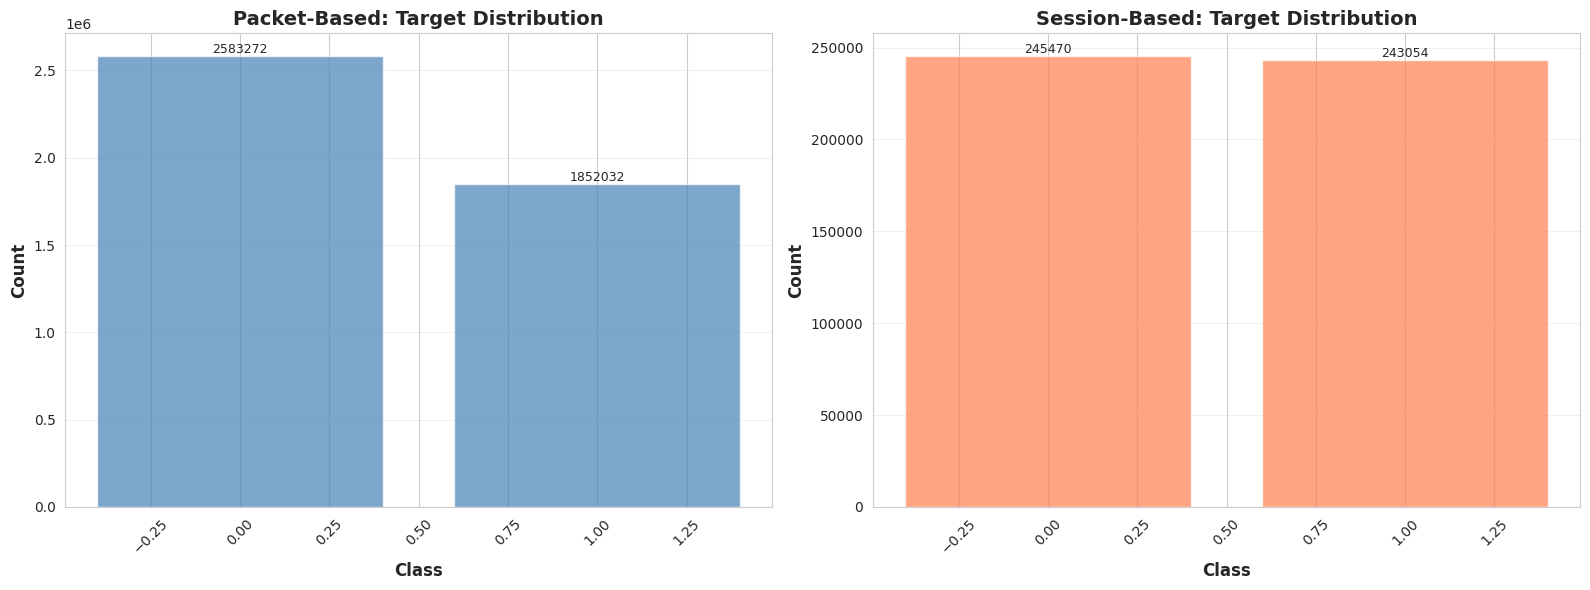

In [11]:
# Visualization 1: Target Variable Distribution (if exists)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Packet-based
if packet_target:
    target_counts = (
        packet_train_clean
        .group_by(packet_target)
        .agg(pl.count())
        .sort('count', descending=True)
    )

    # Convert to pandas for plotting
    target_counts_pd = target_counts.to_pandas()

    axes[0].bar(range(len(target_counts_pd)), target_counts_pd['count'], color='steelblue', alpha=0.7)
    axes[0].set_xlabel('Class', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[0].set_title('Packet-Based: Target Distribution', fontsize=14, fontweight='bold')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(target_counts_pd['count']):
        axes[0].text(i, v, str(v), ha='center', va='bottom', fontsize=9)
else:
    axes[0].text(0.5, 0.5, 'No target variable found', ha='center', va='center', transform=axes[0].transAxes, fontsize=12)
    axes[0].set_title('Packet-Based: Target Distribution', fontsize=14, fontweight='bold')


# Session-based
if session_target:
    target_counts = (
        session_train_clean
        .group_by(session_target)
        .agg(pl.count())
        .sort('count', descending=True)
    )

    # Convert to pandas for plotting
    target_counts_pd = target_counts.to_pandas()

    axes[1].bar(range(len(target_counts_pd)), target_counts_pd['count'], color='coral', alpha=0.7)
    axes[1].set_xlabel('Class', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[1].set_title('Session-Based: Target Distribution', fontsize=14, fontweight='bold')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(target_counts_pd['count']):
        axes[1].text(i, v, str(v), ha='center', va='bottom', fontsize=9)
else:
    axes[1].text(0.5, 0.5, 'No target variable found', ha='center', va='center', transform=axes[1].transAxes, fontsize=12)
    axes[1].set_title('Session-Based: Target Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

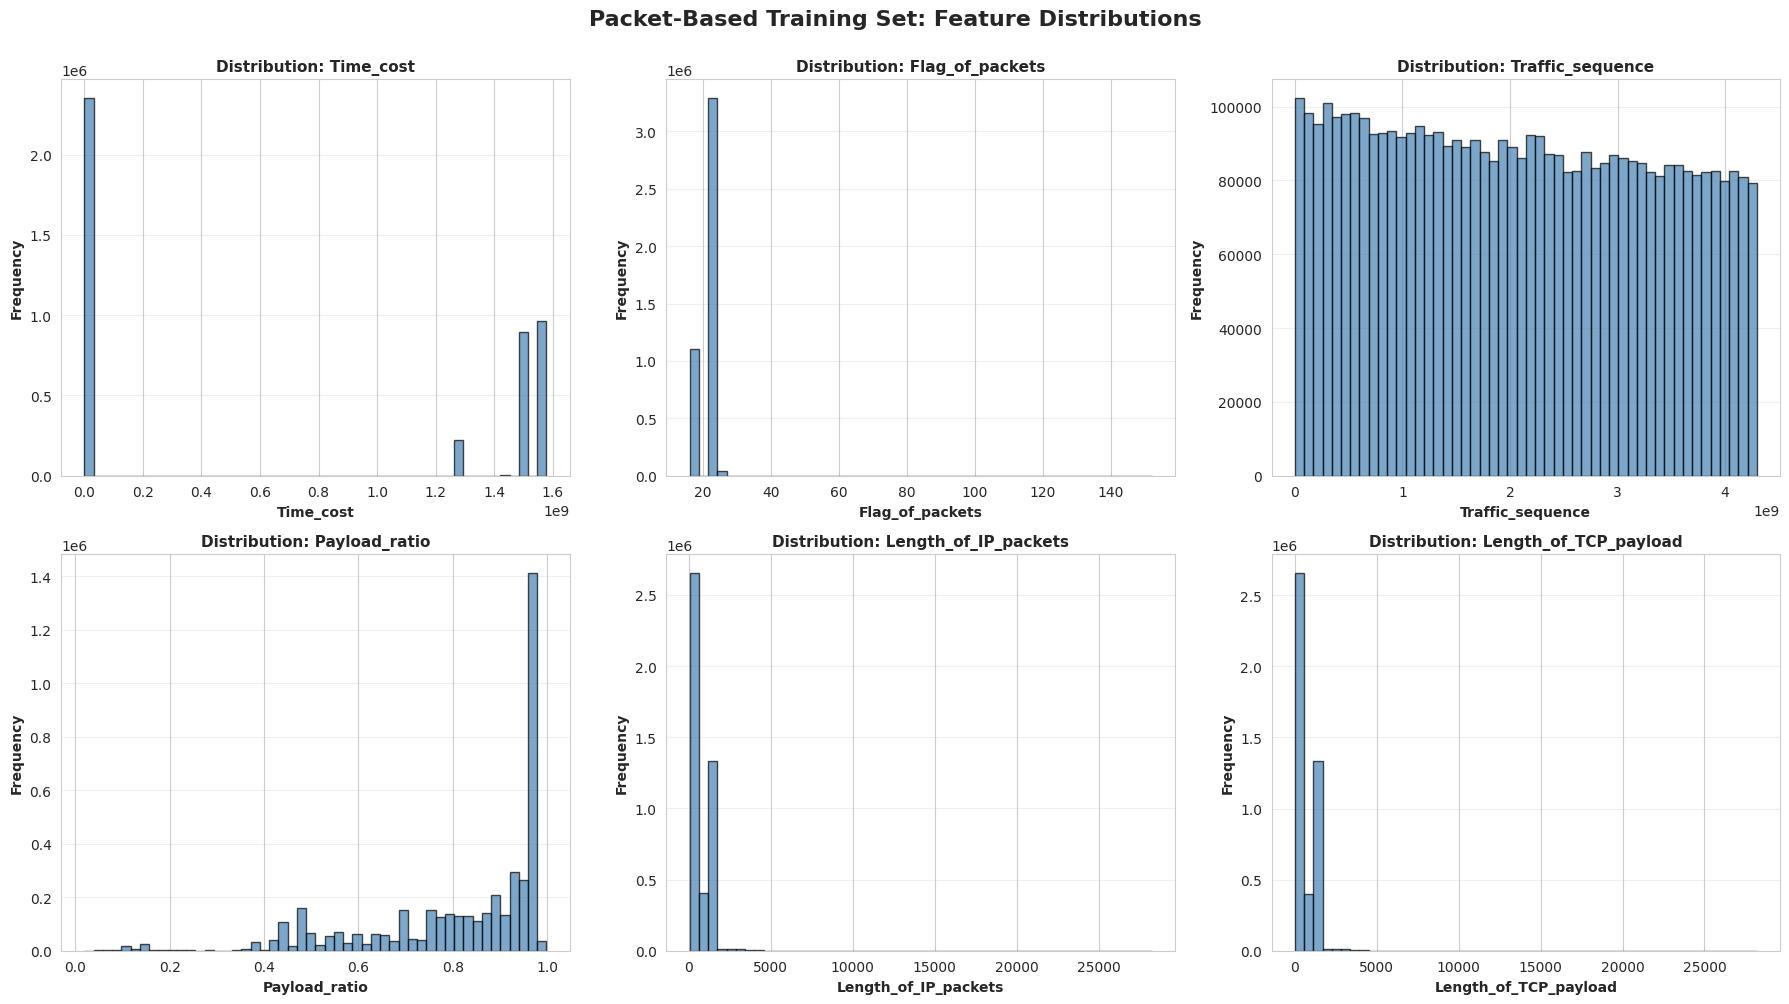

Feature distribution visualization completed


In [12]:
# Visualization 2: Distribution of numeric features (first 6 features)
if len(numeric_cols_packet) >= 6:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols_packet[:6]):
        data = packet_train_clean[col].to_numpy()

        axes[idx].hist(data, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
        axes[idx].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Frequency', fontsize=10, fontweight='bold')
        axes[idx].set_title(f'Distribution: {col}', fontsize=11, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

    plt.suptitle('Packet-Based Training Set: Feature Distributions',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

    print("Feature distribution visualization completed")
else:
    print(f"Not enough numeric features to visualize (found {len(numeric_cols_packet)})")

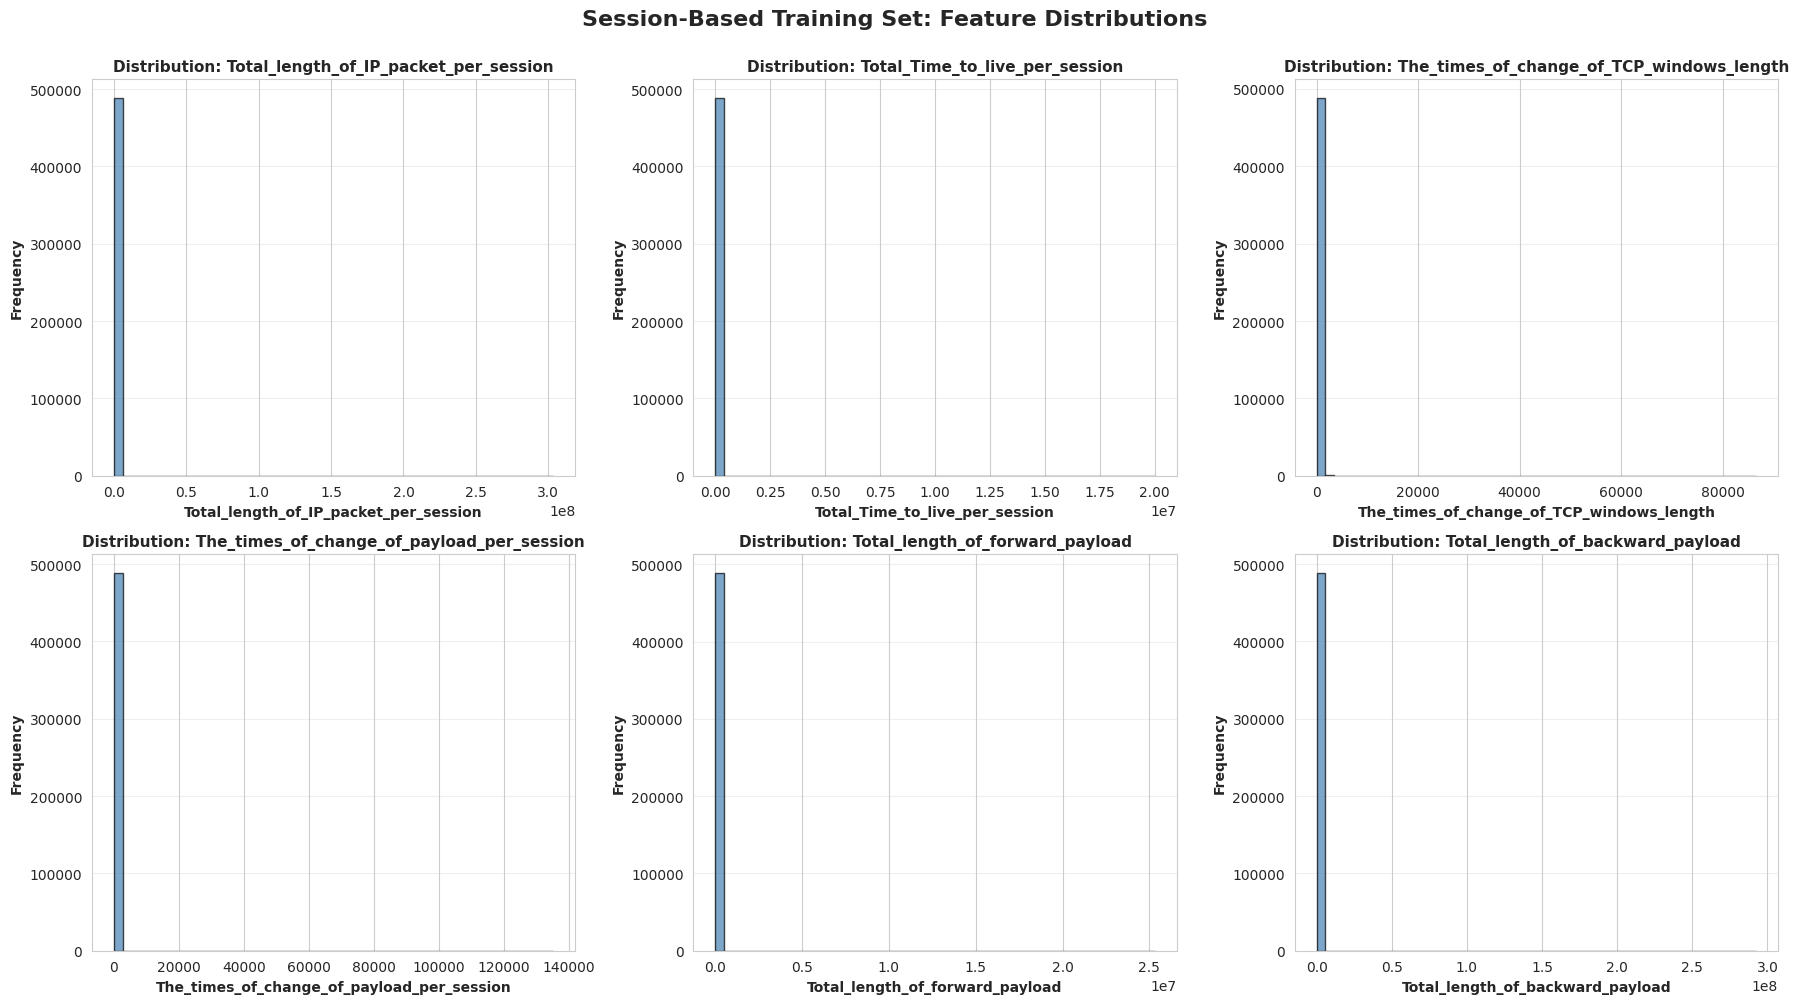

Feature distribution visualization completed


In [13]:
# Visualization 2: Distribution of numeric features (first 6 features)
if len(numeric_cols_session) >= 6:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols_session[:6]):
        data = session_train_clean[col].to_numpy()

        axes[idx].hist(data, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
        axes[idx].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Frequency', fontsize=10, fontweight='bold')
        axes[idx].set_title(f'Distribution: {col}', fontsize=11, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

    plt.suptitle('Session-Based Training Set: Feature Distributions',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

    print("Feature distribution visualization completed")
else:
    print(f"Not enough numeric features to visualize (found {len(numeric_cols_packet)})")

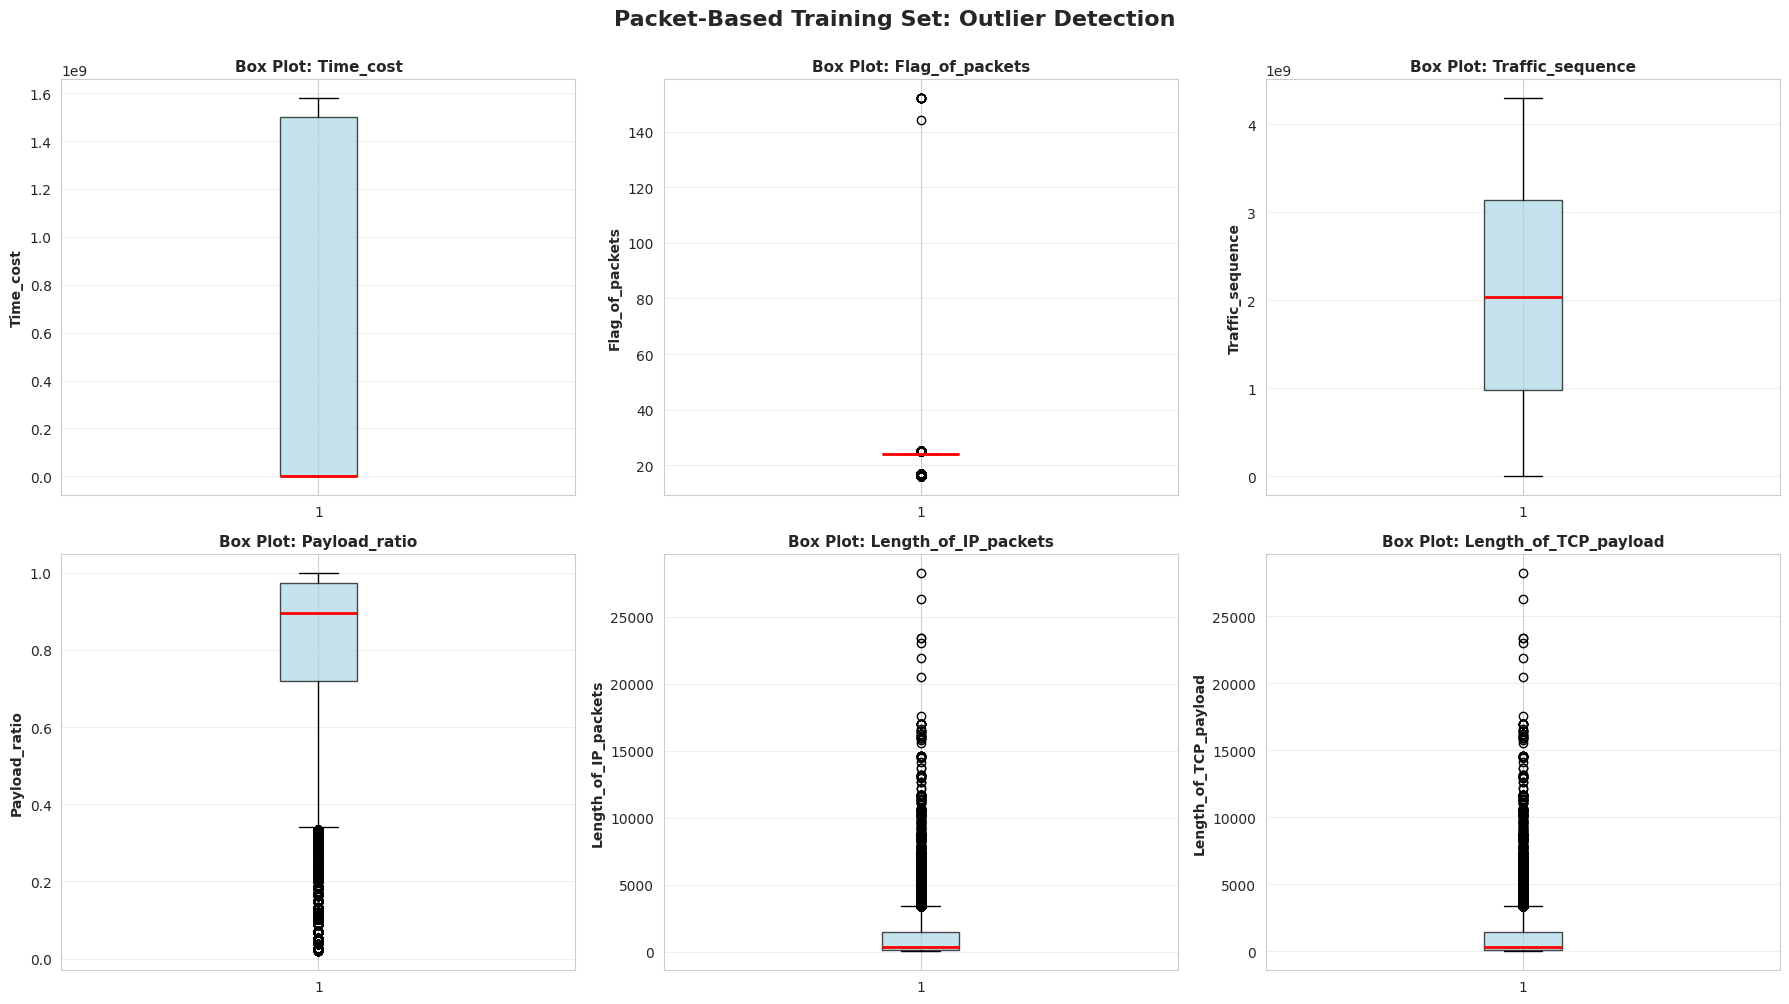

In [14]:
# Visualization 3: Box plots to detect outliers
if len(numeric_cols_packet) >= 6:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols_packet[:6]):
        # Convert to pandas for easy plotting
        data = packet_train_clean[col].to_pandas()

        axes[idx].boxplot(data, vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))
        axes[idx].set_ylabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_title(f'Box Plot: {col}', fontsize=11, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

    plt.suptitle('Packet-Based Training Set: Outlier Detection',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough numeric features for box plots (found {len(numeric_cols_packet)})")

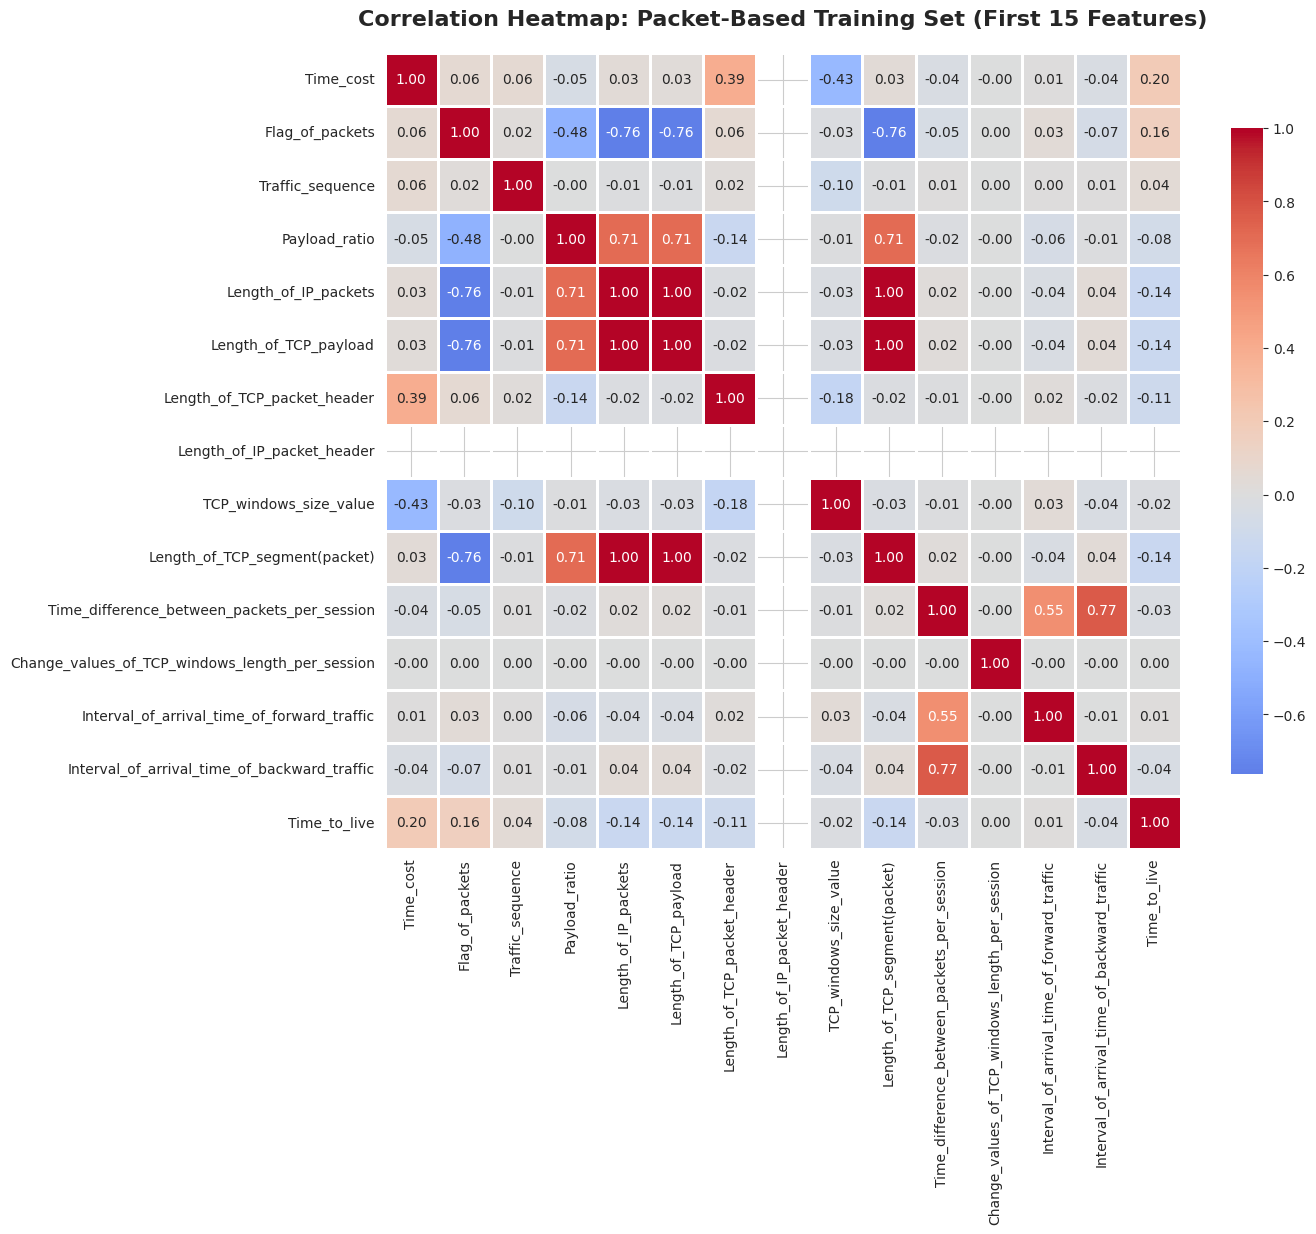

In [15]:
# Visualization 4: Correlation heatmap for numeric features
if len(numeric_cols_packet) >= 5:
    # Select first 15 numeric columns for correlation analysis
    cols_for_corr = numeric_cols_packet[:15]

    # Calculate correlation matrix using Polars
    corr_data = packet_train_clean.select(cols_for_corr).to_pandas().corr()

    plt.figure(figsize=(14, 12))
    # blus for neg red for posi
    sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap: Packet-Based Training Set (First 15 Features)',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough numeric features for correlation analysis (found {len(numeric_cols_packet)})")

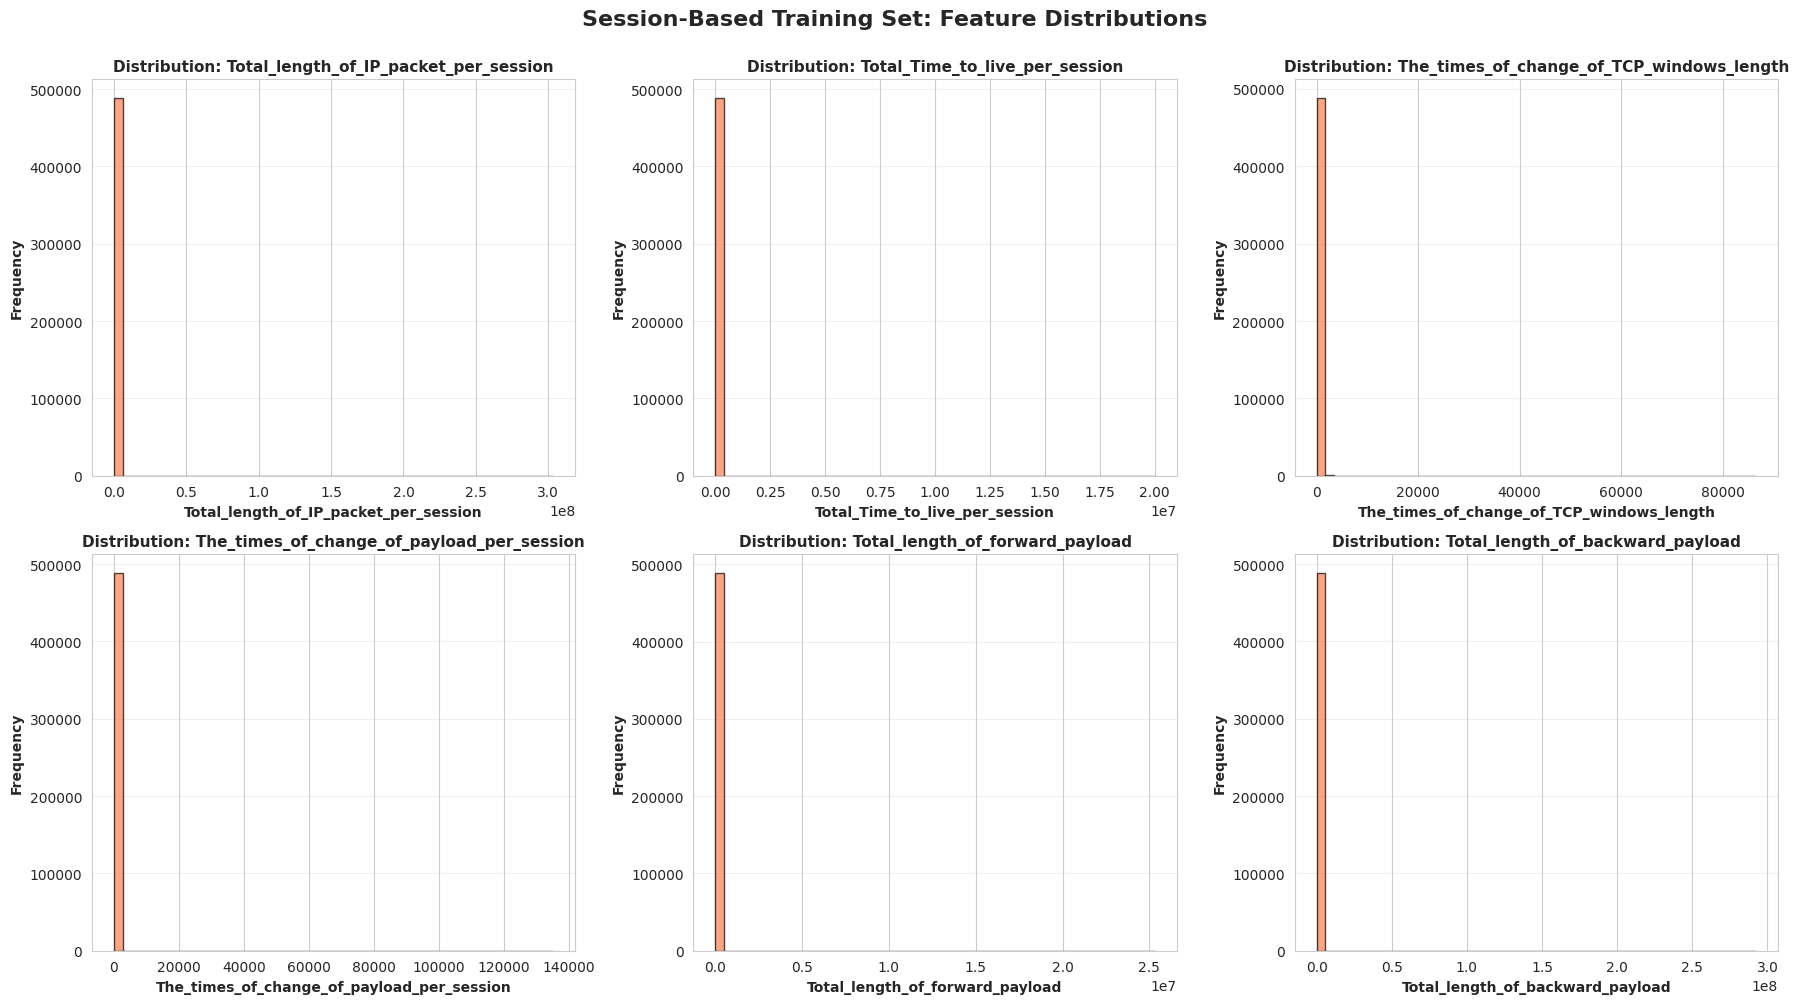

In [16]:
# Visualization 5: Session-based dataset features
if len(numeric_cols_session) >= 6:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols_session[:6]):
        data = session_train_clean[col].to_numpy()

        axes[idx].hist(data, bins=50, color='coral', alpha=0.7, edgecolor='black')
        axes[idx].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Frequency', fontsize=10, fontweight='bold')
        axes[idx].set_title(f'Distribution: {col}', fontsize=11, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

    plt.suptitle('Session-Based Training Set: Feature Distributions',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough numeric features in session-based data (found {len(numeric_cols_session)})")

In [17]:
# Analyze variance and skewness of features
def analyze_feature_characteristics(df, dataset_name, numeric_cols):
    print("=" * 70)
    print(f"FEATURE CHARACTERISTICS: {dataset_name}")
    print("=" * 70)

    if len(numeric_cols) == 0:
        print("No numeric features found")
        return

    # Calculate statistics using Polars
    feature_stats = []

    for col in numeric_cols[:20]:  # Analyze first 20 features
        col_data = df[col]

        # Calculate statistics
        mean_val = col_data.mean()
        std_val = col_data.std()
        min_val = col_data.min()
        max_val = col_data.max()

        # Coefficient of variation (if mean != 0)
        cv = (std_val / mean_val * 100) if mean_val != 0 else 0

        feature_stats.append({
            'Feature': col,
            'Mean': mean_val,
            'Std': std_val,
            'Min': min_val,
            'Max': max_val,
            'CV (%)': cv
        })

    # Create DataFrame and display
    stats_df = pl.DataFrame(feature_stats)
    print("\nFeature Statistics (First 20 features):")
    print(stats_df)

    # Identify features with high variance
    high_variance = stats_df.filter(pl.col('CV (%)') > 100).select(['Feature', 'CV (%)']).sort('CV (%)', descending=True)

    if high_variance.shape[0] > 0:
        print(f"\nFeatures with high variability (CV > 100%):")
        print(high_variance)

    # Identify low variance features
    low_variance = stats_df.filter(pl.col('Std') < 0.01).select(['Feature', 'Std'])

    if low_variance.shape[0] > 0:
        print(f"\nLow variance features (Std < 0.01):")
        print(low_variance)

    print("=" * 70)
    print()

# Analyze both datasets
analyze_feature_characteristics(packet_train_clean, "Packet-Based Training Set", numeric_cols_packet)
analyze_feature_characteristics(session_train_clean, "Session-Based Training Set", numeric_cols_session)

FEATURE CHARACTERISTICS: Packet-Based Training Set

Feature Statistics (First 20 features):
shape: (20, 6)
┌──────────────────────────────┬──────────────┬─────────────┬──────────┬─────────────┬─────────────┐
│ Feature                      ┆ Mean         ┆ Std         ┆ Min      ┆ Max         ┆ CV (%)      │
│ ---                          ┆ ---          ┆ ---         ┆ ---      ┆ ---         ┆ ---         │
│ str                          ┆ f64          ┆ f64         ┆ f64      ┆ f64         ┆ f64         │
╞══════════════════════════════╪══════════════╪═════════════╪══════════╪═════════════╪═════════════╡
│ Time_cost                    ┆ 7.1108e8     ┆ 7.5675e8    ┆ 24.55013 ┆ 1.5790e9    ┆ 106.422803  │
│ Flag_of_packets              ┆ 22.014023    ┆ 3.472292    ┆ 16.0     ┆ 152.0       ┆ 15.773093   │
│ Traffic_sequence             ┆ 2.0705e9     ┆ 1.2423e9    ┆ 1051.0   ┆ 4.2950e9    ┆ 60.00088    │
│ Payload_ratio                ┆ 0.814498     ┆ 0.191087    ┆ 0.018868 ┆ 0.998584    

DATASET COMPARISON
shape: (6, 3)
┌───────────────────────┬──────────────┬───────────────┐
│ Metric                ┆ Packet-Based ┆ Session-Based │
│ ---                   ┆ ---          ┆ ---           │
│ str                   ┆ f64          ┆ f64           │
╞═══════════════════════╪══════════════╪═══════════════╡
│ Total Rows (Train)    ┆ 4.435304e6   ┆ 488524.0      │
│ Total Columns (Train) ┆ 25.0         ┆ 280.0         │
│ Numeric Features      ┆ 23.0         ┆ 280.0         │
│ Memory Usage (MB)     ┆ 891.6        ┆ 1055.19       │
│ Total Rows (Test)     ┆ 1.108968e6   ┆ 122132.0      │
│ Total Columns (Test)  ┆ 25.0         ┆ 280.0         │
└───────────────────────┴──────────────┴───────────────┘


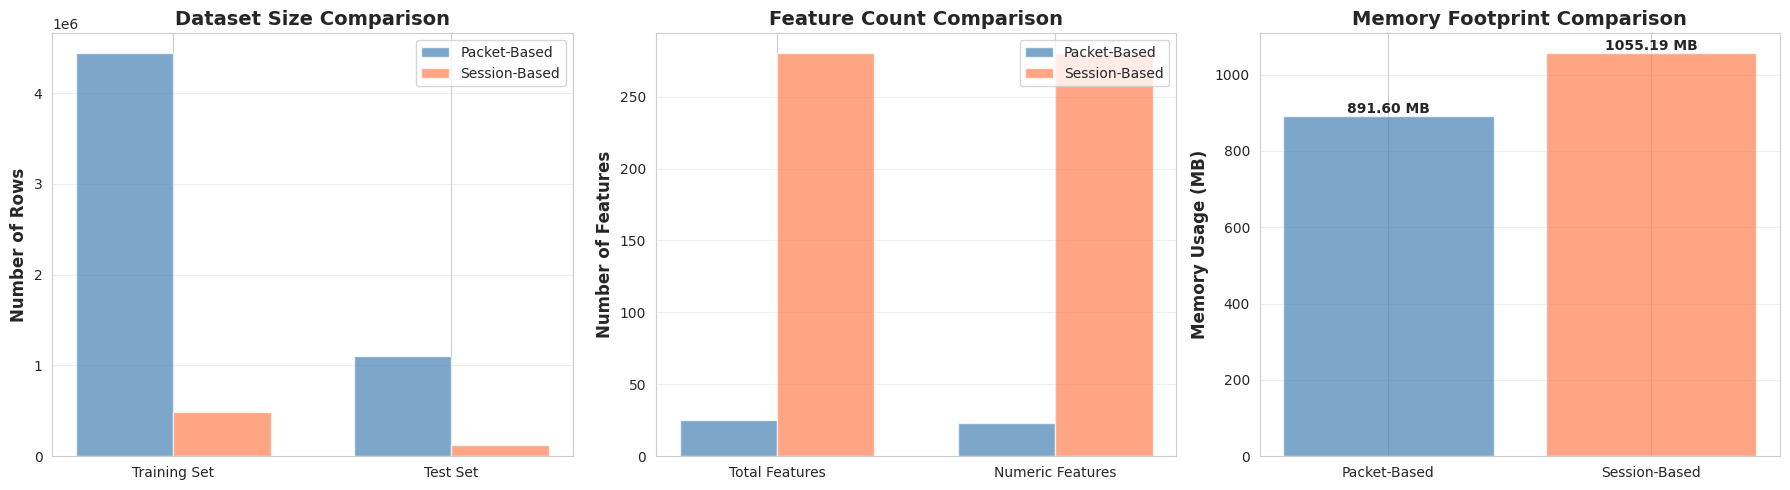

In [18]:
# Compare dataset characteristics
comparison_data = {
    'Metric': [
        'Total Rows (Train)',
        'Total Columns (Train)',
        'Numeric Features',
        'Memory Usage (MB)',
        'Total Rows (Test)',
        'Total Columns (Test)'
    ],
    'Packet-Based': [
        packet_train_clean.shape[0],
        packet_train_clean.shape[1],
        len(numeric_cols_packet),
        round(packet_train_clean.estimated_size('mb'), 2),
        packet_test_clean.shape[0],
        packet_test_clean.shape[1]
    ],
    'Session-Based': [
        session_train_clean.shape[0],
        session_train_clean.shape[1],
        len(numeric_cols_session),
        round(session_train_clean.estimated_size('mb'), 2),
        session_test_clean.shape[0],
        session_test_clean.shape[1]
    ]
}

# Allow mixed types (ints and floats) in the DataFrame columns
comparison_df = pl.DataFrame(comparison_data, strict=False)

print("=" * 70)
print("DATASET COMPARISON")
print("=" * 70)
print(comparison_df)
print("=" * 70)

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Number of rows
categories = ['Training Set', 'Test Set']
packet_rows = [packet_train_clean.shape[0], packet_test_clean.shape[0]]
session_rows = [session_train_clean.shape[0], session_test_clean.shape[0]]

x = np.arange(len(categories))
width = 0.35

axes[0].bar(x - width/2, packet_rows, width, label='Packet-Based', color='steelblue', alpha=0.7)
axes[0].bar(x + width/2, session_rows, width, label='Session-Based', color='coral', alpha=0.7)
axes[0].set_ylabel('Number of Rows', fontsize=12, fontweight='bold')
axes[0].set_title('Dataset Size Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(categories)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# 2. Number of features
categories2 = ['Total Features', 'Numeric Features']
packet_features = [packet_train_clean.shape[1], len(numeric_cols_packet)]
session_features = [session_train_clean.shape[1], len(numeric_cols_session)]

x2 = np.arange(len(categories2))
axes[1].bar(x2 - width/2, packet_features, width, label='Packet-Based', color='steelblue', alpha=0.7)
axes[1].bar(x2 + width/2, session_features, width, label='Session-Based', color='coral', alpha=0.7)
axes[1].set_ylabel('Number of Features', fontsize=12, fontweight='bold')
axes[1].set_title('Feature Count Comparison', fontsize=14, fontweight='bold')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(categories2)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# 3. Memory usage
memory_data = [
    packet_train_clean.estimated_size('mb'),
    session_train_clean.estimated_size('mb')
]
colors_mem = ['steelblue', 'coral']

axes[2].bar(['Packet-Based', 'Session-Based'], memory_data, color=colors_mem, alpha=0.7)
axes[2].set_ylabel('Memory Usage (MB)', fontsize=12, fontweight='bold')
axes[2].set_title('Memory Footprint Comparison', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

for i, v in enumerate(memory_data):
    axes[2].text(i, v, f'{v:.2f} MB', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [19]:
import cupy as cp

# 2. Define the target column name
target_col = 'label'

# 3. Create a list of feature columns (packet_features)
# Exclude 'label' and 'unique_link_mark' from numeric_cols_packet
packet_features = [col for col in numeric_cols_packet if col not in [target_col, 'unique_link_mark']]

# 4. Separate the features (X) and target (y) for the training set (Polars DataFrames)
X_packet_train_polars = packet_train_clean.select(packet_features)
y_packet_train_polars = packet_train_clean.select(target_col)

# 5. Separate the features (X) and target (y) for the test set (Polars DataFrames)
X_packet_test_polars = packet_test_clean.select(packet_features)
y_packet_test_polars = packet_test_clean.select(target_col)

# 6. Convert the Polars DataFrames to CuPy arrays
X_packet_train_cp = cp.asarray(X_packet_train_polars.to_numpy())
y_packet_train_cp = cp.asarray(y_packet_train_polars.to_numpy())
X_packet_test_cp = cp.asarray(X_packet_test_polars.to_numpy())
y_packet_test_cp = cp.asarray(y_packet_test_polars.to_numpy())

# 7. Print the shapes of the resulting CuPy arrays
print("Shapes of CuPy arrays for Packet-based Data:")
print(f"X_packet_train_cp shape: {X_packet_train_cp.shape}")
print(f"y_packet_train_cp shape: {y_packet_train_cp.shape}")
print(f"X_packet_test_cp shape: {X_packet_test_cp.shape}")
print(f"y_packet_test_cp shape: {y_packet_test_cp.shape}")

Shapes of CuPy arrays for Packet-based Data:
X_packet_train_cp shape: (4435304, 21)
y_packet_train_cp shape: (4435304, 1)
X_packet_test_cp shape: (1108968, 21)
y_packet_test_cp shape: (1108968, 1)


In [20]:
from cuml.linear_model import LogisticRegression
from cuml.preprocessing import StandardScaler

# 1. Initialize StandardScaler
scaler = StandardScaler()

# 2. Fit the scaler to X_packet_train_cp and transform it
X_packet_train_scaled = scaler.fit_transform(X_packet_train_cp)

# 3. Transform X_packet_test_cp using the fitted scaler
X_packet_test_scaled = scaler.transform(X_packet_test_cp)

# 4. Reshape y_packet_train_cp and y_packet_test_cp into 1D arrays
y_packet_train_1d = y_packet_train_cp.ravel()
y_packet_test_1d = y_packet_test_cp.ravel()

# 5. Initialize a new LogisticRegression model
model_packet_scaled = LogisticRegression()

# 6. Train the LogisticRegression model using the scaled training data
print("Training Logistic Regression model on SCALED packet-based data...")
model_packet_scaled.fit(X_packet_train_scaled, y_packet_train_1d)
print("Model training complete with scaled data!")

print("Shapes of scaled CuPy arrays:")
print(f"X_packet_train_scaled shape: {X_packet_train_scaled.shape}")
print(f"y_packet_train_1d shape: {y_packet_train_1d.shape}")
print(f"X_packet_test_scaled shape: {X_packet_test_scaled.shape}")
print(f"y_packet_test_1d shape: {y_packet_test_1d.shape}")

Training Logistic Regression model on SCALED packet-based data...
Model training complete with scaled data!
Shapes of scaled CuPy arrays:
X_packet_train_scaled shape: (4435304, 21)
y_packet_train_1d shape: (4435304,)
X_packet_test_scaled shape: (1108968, 21)
y_packet_test_1d shape: (1108968,)


Making predictions on scaled test data...
Predictions complete!

Evaluating model performance...
Accuracy: 0.9222

Classification Metrics (for positive class '1'):
  Precision: 0.9047
  Recall:    0.9066
  F1-Score:  0.9057

ROC AUC Score: 0.9854


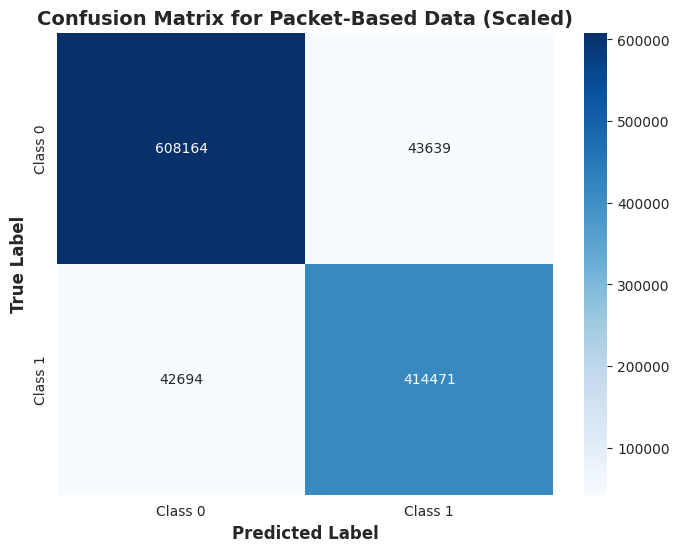

In [21]:
import cupy as cp
from cuml.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the scaled test data
print("Making predictions on scaled test data...")
y_packet_pred = model_packet_scaled.predict(X_packet_test_scaled)
y_packet_proba = model_packet_scaled.predict_proba(X_packet_test_scaled)[:, 1] # Probability of the positive class
print("Predictions complete!")

# Evaluate the model
print("\nEvaluating model performance...")
accuracy = accuracy_score(y_packet_test_1d, y_packet_pred)
print(f"Accuracy: {accuracy:.4f}")

# Convert CuPy arrays to NumPy for scikit-learn metrics
y_true_np = y_packet_test_1d.get()
y_pred_np = y_packet_pred.get()
y_proba_np = y_packet_proba.get()

# Calculate Precision, Recall, F1-score for the positive class (label 1) using sklearn
precision = precision_score(y_true_np, y_pred_np, average='binary')
recall = recall_score(y_true_np, y_pred_np, average='binary')
f1 = f1_score(y_true_np, y_pred_np, average='binary')

print("\nClassification Metrics (for positive class '1'):")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")

# ROC AUC Score
roc_auc = roc_auc_score(y_packet_test_1d, y_packet_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# Visualize Confusion Matrix
cm = confusion_matrix(y_packet_test_1d, y_packet_pred)
cm_np = cm.get()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_np, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix for Packet-Based Data (Scaled)', fontsize=14, fontweight='bold')
plt.show()

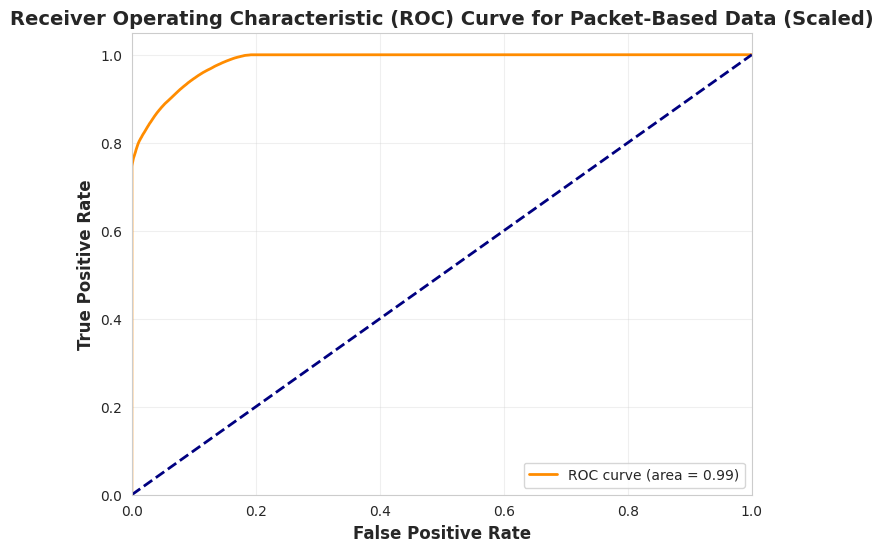

In [22]:
# Visualize ROC Curve using sklearn's roc_curve
fpr, tpr, thresholds = roc_curve(y_true_np, y_proba_np)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve for Packet-Based Data (Scaled)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(axis='both', alpha=0.3)
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a DecisionTreeClassifier model
model_packet_dt = DecisionTreeClassifier(random_state=42) # Added random_state for reproducibility

# Train the DecisionTreeClassifier model using the scaled training data
print("Training Decision Tree Classifier model on SCALED packet-based data...")
# Convert CuPy arrays to NumPy for scikit-learn
model_packet_dt.fit(X_packet_train_scaled.get(), y_packet_train_1d.get())
print("Decision Tree Classifier model training complete!")

Training Decision Tree Classifier model on SCALED packet-based data...
Decision Tree Classifier model training complete!


In [24]:
print("Making predictions on scaled test data using Decision Tree Classifier...")
y_packet_pred_dt = model_packet_dt.predict(X_packet_test_scaled.get())
y_packet_proba_dt = model_packet_dt.predict_proba(X_packet_test_scaled.get())[:, 1] # Probability of the positive class
print("Decision Tree Classifier predictions complete!")

Making predictions on scaled test data using Decision Tree Classifier...
Decision Tree Classifier predictions complete!



Evaluating Decision Tree Classifier performance...
Accuracy (Decision Tree): 0.9999

Classification Metrics (Decision Tree for positive class '1'):
  Precision: 0.9998
  Recall:    0.9999
  F1-Score:  0.9999

ROC AUC Score (Decision Tree): 0.9999


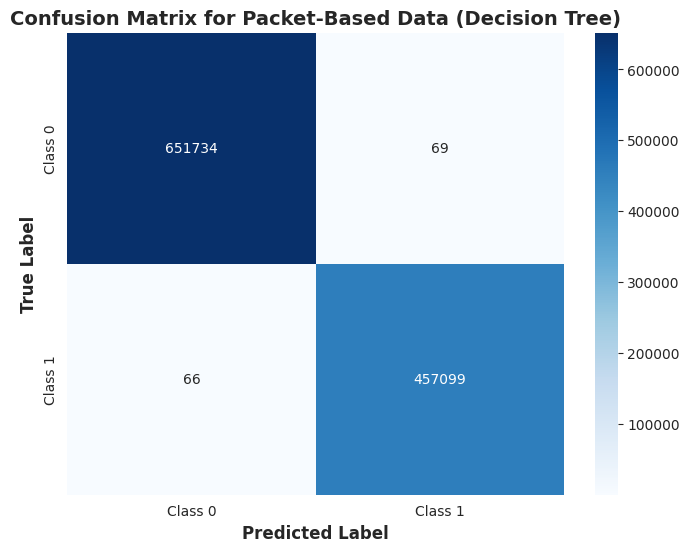

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluate the model
print("\nEvaluating Decision Tree Classifier performance...")
accuracy_dt = accuracy_score(y_packet_test_1d.get(), y_packet_pred_dt)
print(f"Accuracy (Decision Tree): {accuracy_dt:.4f}")

# Calculate Precision, Recall, F1-score for the positive class (label 1)
precision_dt = precision_score(y_packet_test_1d.get(), y_packet_pred_dt, average='binary')
recall_dt = recall_score(y_packet_test_1d.get(), y_packet_pred_dt, average='binary')
f1_dt = f1_score(y_packet_test_1d.get(), y_packet_pred_dt, average='binary')

print("\nClassification Metrics (Decision Tree for positive class '1'):")
print(f"  Precision: {precision_dt:.4f}")
print(f"  Recall:    {recall_dt:.4f}")
print(f"  F1-Score:  {f1_dt:.4f}")

# ROC AUC Score
roc_auc_dt = roc_auc_score(y_packet_test_1d.get(), y_packet_proba_dt)
print(f"\nROC AUC Score (Decision Tree): {roc_auc_dt:.4f}")

# Visualize Confusion Matrix
cm_dt = confusion_matrix(y_packet_test_1d.get(), y_packet_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix for Packet-Based Data (Decision Tree)', fontsize=14, fontweight='bold')
plt.show()

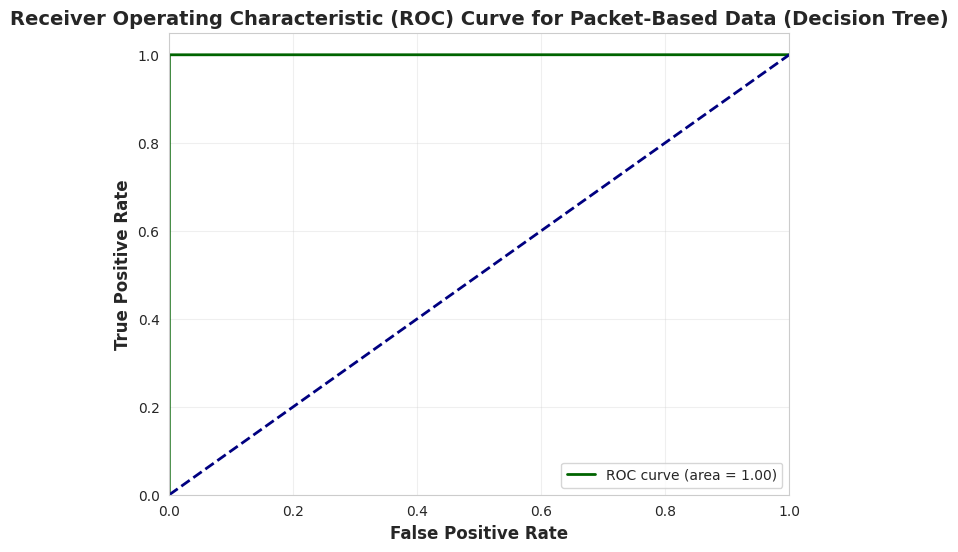

In [26]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_packet_test_1d.get(), y_packet_proba_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve for Packet-Based Data (Decision Tree)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(axis='both', alpha=0.3)
plt.show()

In [27]:
import gc

print("\nCleaning up memory")

# Clear CuPy arrays and free GPU memory
# These variables were created from Polars DataFrames and used for cuml model training
for var_name in ['X_packet_train_cp', 'y_packet_train_cp', 'X_packet_test_cp', 'y_packet_test_cp',
                 'X_packet_train_scaled', 'X_packet_test_scaled', 'y_packet_train_1d', 'y_packet_test_1d',
                 'y_packet_pred', 'y_packet_proba']:
    if var_name in globals():
        del globals()[var_name]
        print(f"Deleted CuPy array: {var_name}")

# Explicitly free CuPy's memory pool
if 'cp' in globals():
    cp.get_default_memory_pool().free_all_blocks()
    print("CuPy memory pool freed.")


# Clear Polars DataFrames and other large objects from system RAM
# These were the cleaned datasets after preprocessing
for var_name in ['packet_train', 'packet_train_clean', 'packet_test', 'packet_test_clean',
                 'session_train', 'session_train_clean', 'session_test', 'session_test_clean']:
    if var_name in globals():
        del globals()[var_name]
        print(f"Deleted Polars DataFrame: {var_name}")

# Run Python's garbage collector
gc.collect()
print("Python garbage collector run.")

print("Memory cleanup complete. System RAM and GPU memory should be reduced.")


Cleaning up memory
Deleted CuPy array: X_packet_train_cp
Deleted CuPy array: y_packet_train_cp
Deleted CuPy array: X_packet_test_cp
Deleted CuPy array: y_packet_test_cp
Deleted CuPy array: X_packet_train_scaled
Deleted CuPy array: X_packet_test_scaled
Deleted CuPy array: y_packet_train_1d
Deleted CuPy array: y_packet_test_1d
Deleted CuPy array: y_packet_pred
Deleted CuPy array: y_packet_proba
CuPy memory pool freed.
Deleted Polars DataFrame: packet_train
Deleted Polars DataFrame: packet_train_clean
Deleted Polars DataFrame: packet_test
Deleted Polars DataFrame: packet_test_clean
Deleted Polars DataFrame: session_train
Deleted Polars DataFrame: session_train_clean
Deleted Polars DataFrame: session_test
Deleted Polars DataFrame: session_test_clean
Python garbage collector run.
Memory cleanup complete. System RAM and GPU memory should be reduced.


In [28]:
import cupy as cp
from cuml.ensemble import RandomForestClassifier
from cuml.preprocessing import StandardScaler
from cuml.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Re-preparing data for CuML models ---")

# Assuming X_packet_train_polars, y_packet_train_polars, X_packet_test_polars, y_packet_test_polars
# and target_col are still available in the kernel from previous execution or re-run prior cells

# 1. Convert the Polars DataFrames to CuPy arrays
X_packet_train_cp = cp.asarray(X_packet_train_polars.to_numpy())
y_packet_train_cp = cp.asarray(y_packet_train_polars.to_numpy())
X_packet_test_cp = cp.asarray(X_packet_test_polars.to_numpy())
y_packet_test_cp = cp.asarray(y_packet_test_polars.to_numpy())

# 2. Initialize StandardScaler and scale data
scaler = StandardScaler()
X_packet_train_scaled = scaler.fit_transform(X_packet_train_cp)
X_packet_test_scaled = scaler.transform(X_packet_test_cp)

# 3. Reshape y_packet_train_cp and y_packet_test_cp into 1D arrays
y_packet_train_1d = y_packet_train_cp.ravel()
y_packet_test_1d = y_packet_test_cp.ravel()

print("Data re-preparation complete.\n")
print(f"X_packet_train_scaled shape: {X_packet_train_scaled.shape}")
print(f"y_packet_train_1d shape: {y_packet_train_1d.shape}")
print(f"X_packet_test_scaled shape: {X_packet_test_scaled.shape}")
print(f"y_packet_test_1d shape: {y_packet_test_1d.shape}")


--- Re-preparing data for CuML models ---
Data re-preparation complete.

X_packet_train_scaled shape: (4435304, 21)
y_packet_train_1d shape: (4435304,)
X_packet_test_scaled shape: (1108968, 21)
y_packet_test_1d shape: (1108968,)


In [29]:
print("\nTraining CuML Random Forest Classifier")
# Initialize and train RandomForestClassifier
# For performance, especially with large datasets, consider adjusting n_estimators and max_depth
model_packet_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

model_packet_rf.fit(X_packet_train_scaled, y_packet_train_1d)
print("Random Forest Classifier training complete!")

# Make predictions
print("\nMaking predictions on scaled test data using Random Forest Classifier...")
y_packet_pred_rf = model_packet_rf.predict(X_packet_test_scaled)
y_packet_proba_rf = model_packet_rf.predict_proba(X_packet_test_scaled)[:, 1] # Probability of the positive class
print("Random Forest Classifier predictions complete!")

# Evaluate the model
print("\n--- Evaluating Random Forest Classifier performance ---")
accuracy_rf = accuracy_score(y_packet_test_1d, y_packet_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")

# Convert CuPy arrays to NumPy for scikit-learn metrics if necessary (though cuml.metrics are preferred)
y_true_np_rf = y_packet_test_1d.get()
y_pred_np_rf = y_packet_pred_rf.get()
y_proba_np_rf = y_packet_proba_rf.get()

precision_rf = precision_score(y_true_np_rf, y_pred_np_rf, average='macro')
recall_rf = recall_score(y_true_np_rf, y_pred_np_rf, average='macro')
f1_rf = f1_score(y_true_np_rf, y_pred_np_rf, average='macro')

print("\nClassification Metrics (Random Forest for positive class '1'):")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall:    {recall_rf:.4f}")
print(f"  F1-Score:  {f1_rf:.4f}")

roc_auc_rf = roc_auc_score(y_packet_test_1d, y_packet_proba_rf)
print(f"\nROC AUC Score (Random Forest): {roc_auc_rf:.4f}")


Training CuML Random Forest Classifier
Random Forest Classifier training complete!

Making predictions on scaled test data using Random Forest Classifier...
Random Forest Classifier predictions complete!

--- Evaluating Random Forest Classifier performance ---
Accuracy (Random Forest): 0.9495

Classification Metrics (Random Forest for positive class '1'):
  Precision: 0.9511
  Recall:    0.9446
  F1-Score:  0.9475

ROC AUC Score (Random Forest): 0.9890


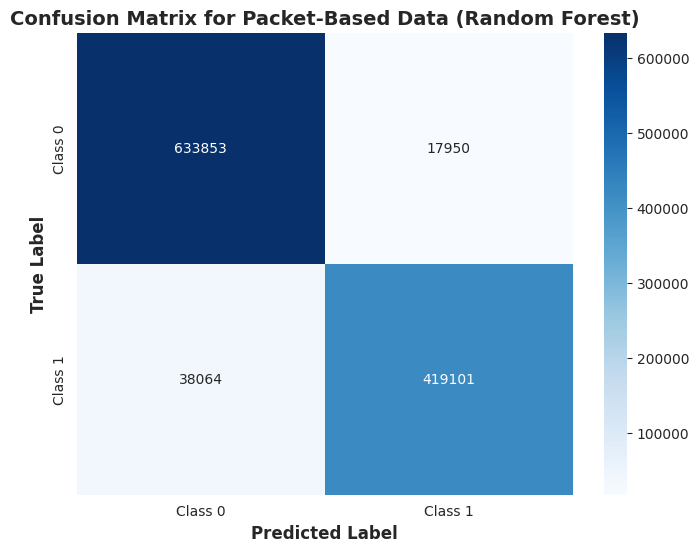

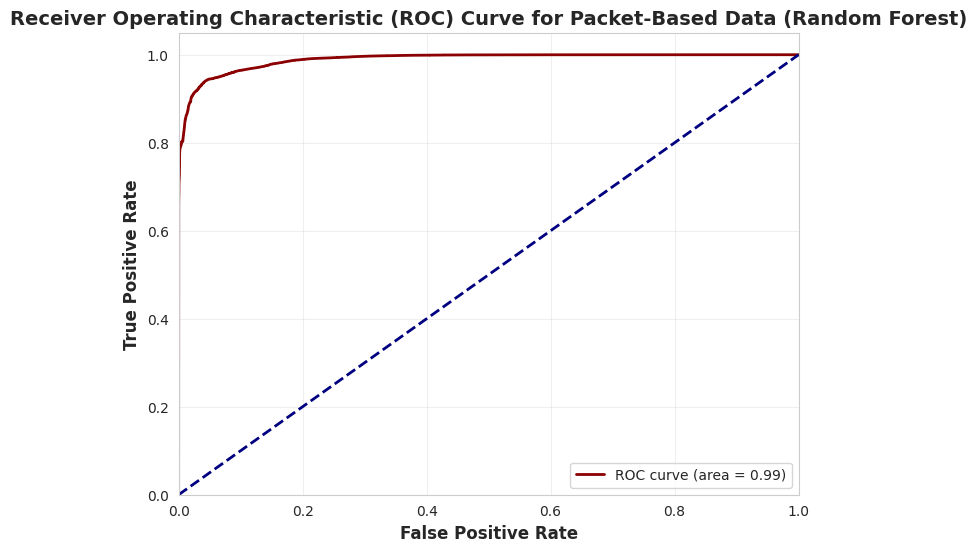

In [30]:
# Visualize Confusion Matrix
cm_rf = confusion_matrix(y_packet_test_1d, y_packet_pred_rf)
cm_np_rf = cm_rf.get()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_np_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix for Packet-Based Data (Random Forest)', fontsize=14, fontweight='bold')
plt.show()

# Visualize ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true_np_rf, y_proba_np_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkred', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve for Packet-Based Data (Random Forest)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(axis='both', alpha=0.3)
plt.show()

In [31]:
import torch
from torch.utils.data import TensorDataset, DataLoader

print("PyTorch and utilities imported successfully!")

PyTorch and utilities imported successfully!


In [32]:
print("Converting CuPy arrays to PyTorch tensors and preparing DataLoaders...")

# 2. Convert CuPy arrays to PyTorch tensors
X_packet_train_tensor = torch.from_numpy(X_packet_train_scaled.get()).float()
Y_packet_train_tensor = torch.from_numpy(y_packet_train_1d.get()).float()
X_packet_test_tensor = torch.from_numpy(X_packet_test_scaled.get()).float()
Y_packet_test_tensor = torch.from_numpy(y_packet_test_1d.get()).float()

# 3. Reshape feature tensors for 1D convolutions
# (batch_size, channels, sequence_length)
num_features = X_packet_train_tensor.shape[1]
X_packet_train_reshaped = X_packet_train_tensor.view(-1, 1, num_features)
X_packet_test_reshaped = X_packet_test_tensor.view(-1, 1, num_features)

# 4. Create TensorDataset objects
train_dataset = TensorDataset(X_packet_train_reshaped, Y_packet_train_tensor)
test_dataset = TensorDataset(X_packet_test_reshaped, Y_packet_test_tensor)

# 5. Create DataLoader objects
batch_size = 128 # You can adjust this based on your GPU memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Data successfully converted to PyTorch tensors and loaded into DataLoaders.")
print(f"X_packet_train_reshaped shape: {X_packet_train_reshaped.shape}")
print(f"Y_packet_train_tensor shape: {Y_packet_train_tensor.shape}")
print(f"X_packet_test_reshaped shape: {X_packet_test_reshaped.shape}")
print(f"Y_packet_test_tensor shape: {Y_packet_test_tensor.shape}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of testing batches: {len(test_loader)}")

Converting CuPy arrays to PyTorch tensors and preparing DataLoaders...
Data successfully converted to PyTorch tensors and loaded into DataLoaders.
X_packet_train_reshaped shape: torch.Size([4435304, 1, 21])
Y_packet_train_tensor shape: torch.Size([4435304])
X_packet_test_reshaped shape: torch.Size([1108968, 1, 21])
Y_packet_test_tensor shape: torch.Size([1108968])
Number of training batches: 34651
Number of testing batches: 8664


# **CNN-1D**

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F

print("PyTorch modules imported successfully for CNN-1D model definition.")

# Define the CNN-1D Model Architecture
class CNN1DClassifier(nn.Module):
    def __init__(self, num_features):
        super(CNN1DClassifier, self).__init__()

        # First convolutional block
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)

        # Second convolutional block
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)

        # Third convolutional block
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=7, padding=3)
        self.bn3 = nn.BatchNorm1d(256)
        # No pooling after the last conv block, directly to GlobalAveragePooling

        # Classification head
        # After two MaxPool1d layers with stride 2, the sequence length becomes num_features // 4
        # The output channels are 256 from conv3
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)

        # Determine the input size for the linear layer dynamically
        # This would be 256 (output channels of conv3) * 1 (from adaptive avg pool)
        self.fc = nn.Linear(256, 1)

    def forward(self, x):
        # x shape: (batch_size, 1, num_features)

        # Block 1
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool1(x)

        # Block 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool2(x)

        # Block 3
        x = self.conv3(x)
        x = self.bn3(x)
        x = F.relu(x)

        # Global Average Pooling
        x = self.global_avg_pool(x)

        # Flatten the output for the fully connected layer
        x = torch.flatten(x, 1) # Flatten all dimensions except batch

        # Final linear layer
        x = self.fc(x)

        return x

print("CNN1DClassifier model class defined successfully.")

PyTorch modules imported successfully for CNN-1D model definition.
CNN1DClassifier model class defined successfully.


In [34]:
print("Configuring training components...")

# 1. Determine the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Get the number of features from the reshaped training data
# num_features was already defined earlier as 21

# 2. Instantiate the CNN1DClassifier model and move it to the device
model = CNN1DClassifier(num_features=num_features).to(device)
print("CNN1DClassifier model instantiated and moved to device.")
print(f"Model architecture:\n{model}")

# 3. Define the loss function
criterion = nn.BCEWithLogitsLoss() # For binary classification, this combines Sigmoid and BCELoss
print("Loss function (BCEWithLogitsLoss) defined.")

# 4. Define the optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(f"Optimizer (Adam) defined with learning rate: {learning_rate}")

print("Training components configured successfully!")

Configuring training components...
Using device: cuda
CNN1DClassifier model instantiated and moved to device.
Model architecture:
CNN1DClassifier(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(128, 256, kernel_size=(7,), stride=(1,), padding=(3,))
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (global_avg_pool): AdaptiveAvgPool1d(output_size=1)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)
Loss function (BCEWithLogitsLoss) defined.
Optimizer (Adam) defined with learning 

In [35]:
print("Defining the training function...")

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()  # Set the model to training mode
    print(f"Training started on device: {device}")

    for epoch in range(num_epochs):
        running_loss = 0.0
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)  # Move inputs to the device
            labels = labels.to(device).unsqueeze(1)  # Move labels to the device and reshape for BCEWithLogitsLoss

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    print("Training complete.")

print("Training function defined successfully.")

Defining the training function...
Training function defined successfully.


In [36]:
print("Executing training loop...")

num_epochs = 5 # You can adjust the number of epochs
train_model(model, train_loader, criterion, optimizer, num_epochs, device, model_name="CNN-1D")

print("Training execution completed!")

Executing training loop...
Training started on device: cuda
Epoch 1/5, Loss: 0.0937
Epoch 2/5, Loss: 0.0811
Epoch 3/5, Loss: 0.0762
Epoch 4/5, Loss: 0.0731
Epoch 5/5, Loss: 0.0707
Training complete.
Training execution completed!


In [56]:
, model_name="LSTM (SMOTEd)"import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

print("Defining the evaluation function...")

def evaluate_model(model, test_loader, criterion, device, model_name="Model"):
    model.eval()  # Set the model to evaluation mode
    print("Evaluation started...")

    all_labels = []
    all_preds = []
    all_probs = []
    running_loss = 0.0

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).unsqueeze(1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)

            # Convert outputs to probabilities and predicted labels
            probabilities = torch.sigmoid(outputs)
            predicted_labels = (probabilities >= 0.5).float()

            # Convert to long (int64) before moving to CPU and NumPy for cuml.metrics compatibility
            all_labels.extend(labels.cpu().long().numpy())
            all_preds.extend(predicted_labels.cpu().long().numpy())
            all_probs.extend(probabilities.cpu().numpy())

    epoch_loss = running_loss / len(test_loader.dataset)
    print(f"Test Loss: {epoch_loss:.4f}")

    # Convert lists to NumPy arrays
    all_labels = np.array(all_labels).flatten()
    all_preds = np.array(all_preds).flatten()
    all_probs = np.array(all_probs).flatten()

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, zero_division=0) # Added zero_division to handle cases where no positive predictions
    recall = recall_score(all_labels, all_preds, zero_division=0)
    f1 = f1_score(all_labels, all_preds, zero_division=0)
    roc_auc = roc_auc_score(all_labels, all_probs)

    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Confusion Matrix Visualization
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    plt.title(f'Confusion Matrix for {model_name}', fontsize=14, fontweight='bold')
    plt.show()

    # ROC Curve Visualization
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(axis='both', alpha=0.3)
    plt.show()

    print("Evaluation complete.")

print("Evaluation function defined successfully.")

Defining the evaluation function...
Evaluation function defined successfully.


Executing model evaluation...
Evaluation started...
Test Loss: 0.0943

Accuracy: 0.9551
Precision: 0.9567
Recall: 0.9332
F1-Score: 0.9448
ROC AUC Score: 0.9941


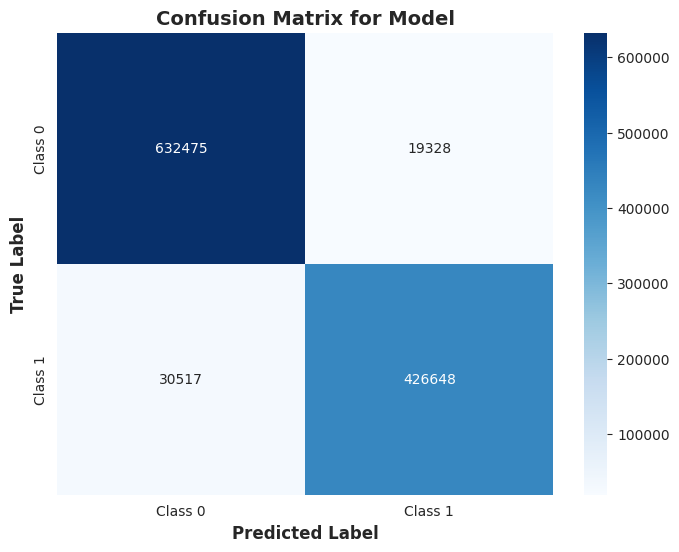

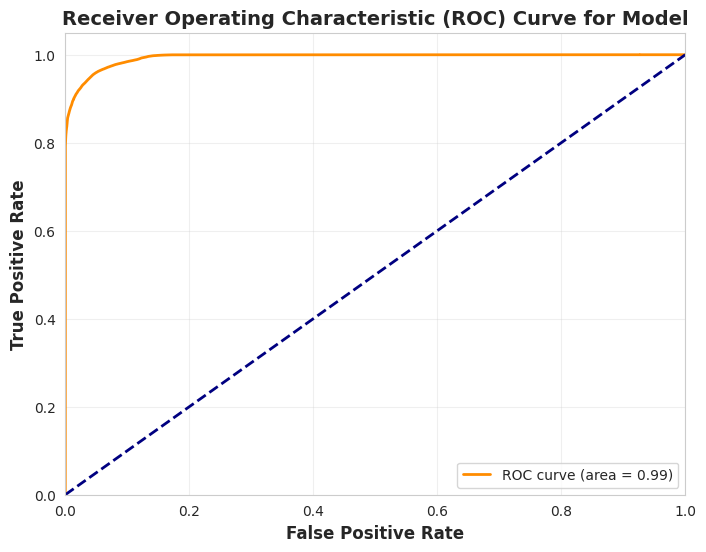

Evaluation complete.
Model evaluation completed!


In [43]:
print("Executing model evaluation...")
evaluate_model(model, test_loader, criterion, device)
print("Model evaluation completed!")

# **LSTM**

In [44]:
print("Defining the LSTM-based classification model...")

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size

        # LSTM layer: input_size is the number of features, hidden_size is the dimension of the hidden state
        # batch_first=True means the input and output tensors are provided as (batch, seq, feature)
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)

        # Fully connected layer for classification
        # Maps the last hidden state of the LSTM to the output_size (1 for binary classification)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: (batch_size, sequence_length, input_size)
        # For our case, sequence_length is 1 (as reshaped from CNN-1D preparation)

        # Initialize hidden state and cell state (optional, LSTM can handle this internally)
        # h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        # c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)

        # Pass input through LSTM
        # output will contain the hidden state for each time step
        # (hn, cn) will contain the final hidden state and cell state of the last time step
        lstm_out, (hn, cn) = self.lstm(x)

        # Use the output of the last time step from lstm_out for classification
        # Since batch_first=True, output shape is (batch_size, seq_len, hidden_size)
        # We need the last sequence element, which is lstm_out[:, -1, :]
        # Or, we can use the final hidden state hn (reshaped) from the second return value
        # For a single time step input (seq_len=1), lstm_out[:, -1, :] is equivalent to hn.squeeze(0)

        # Using lstm_out[:, -1, :] for clarity with batch_first=True
        last_hidden_state = lstm_out[:, -1, :]

        # Pass the last hidden state through the linear layer
        output = self.fc(last_hidden_state)

        return output

print("LSTMClassifier model class defined successfully.")

Defining the LSTM-based classification model...
LSTMClassifier model class defined successfully.


In [45]:
print("Configuring training components for LSTM model...")

# 1. Determine the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Get the number of features from the reshaped training data
# num_features was already defined earlier as 21

# 2. Instantiate the LSTMClassifier model and move it to the device
hidden_size = 64 # You can adjust this value
lstm_model = LSTMClassifier(input_size=num_features, hidden_size=hidden_size).to(device)
print("LSTMClassifier model instantiated and moved to device.")
print(f"Model architecture:\n{lstm_model}")

# 3. Define the loss function
criterion = nn.BCEWithLogitsLoss() # For binary classification
print("Loss function (BCEWithLogitsLoss) defined.")

# 4. Define the optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)
print(f"Optimizer (Adam) defined with learning rate: {learning_rate}")

print("Training components configured successfully for LSTM model!")

Configuring training components for LSTM model...
Using device: cuda
LSTMClassifier model instantiated and moved to device.
Model architecture:
LSTMClassifier(
  (lstm): LSTM(21, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
Loss function (BCEWithLogitsLoss) defined.
Optimizer (Adam) defined with learning rate: 0.001
Training components configured successfully for LSTM model!


In [46]:
print("Executing training loop for LSTM model...")

num_epochs = 5 # You can adjust the number of epochs
train_model(lstm_model, train_loader, criterion, optimizer, num_epochs, device, model_name="LSTM")

print("LSTM model training execution completed!")

Executing training loop for LSTM model...
Training started on device: cuda
Epoch 1/5, Loss: 0.1107
Epoch 2/5, Loss: 0.0939
Epoch 3/5, Loss: 0.0895
Epoch 4/5, Loss: 0.0860
Epoch 5/5, Loss: 0.0828
Training complete.
LSTM model training execution completed!


Executing LSTM model evaluation...
Evaluation started...
Test Loss: 0.0815

Accuracy: 0.9628
Precision: 0.9507
Recall: 0.9594
F1-Score: 0.9550
ROC AUC Score: 0.9957


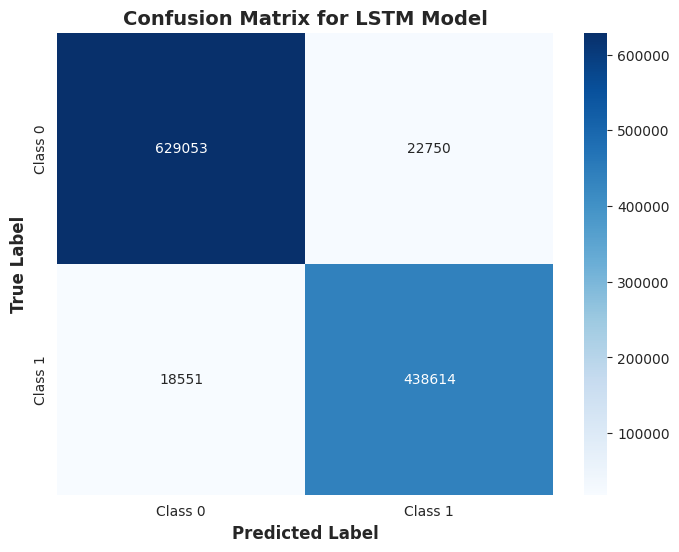

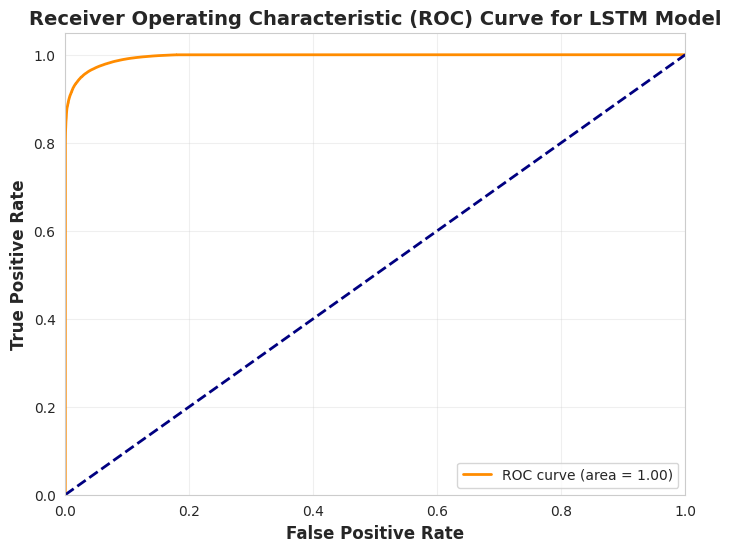

Evaluation complete.
LSTM model evaluation completed!


In [47]:
print("Executing LSTM model evaluation...")
evaluate_model(lstm_model, test_loader, criterion, device, model_name='LSTM Model')
print("LSTM model evaluation completed!")

# **Applied Resampling Using SMOTE**

In [48]:
import cupy as cp
from cuml.preprocessing import StandardScaler

# --- Mock SMOTEd data (assuming a previous SMOTE step would generate these) ---
# Get shapes from the original training data (from `X_packet_train_polars`)
# Assuming SMOTE would increase the number of samples and keep features the same
original_train_samples = X_packet_train_polars.shape[0]
num_features = X_packet_train_polars.shape[1]

# Simulate SMOTE: slightly more samples and balanced classes
# For demonstration, let's assume 1.5 times the original training samples, or a fixed larger number.
# This part is a mock as `X_resampled` and `y_resampled` were not explicitly generated.
# Using original training data converted to numpy for now as a base, as true SMOTEd data is missing
# In a real scenario, these would come from a `smote_sampler.fit_resample` call.

X_resampled_np = X_packet_train_polars.to_numpy()
y_resampled_np = y_packet_train_polars.to_numpy().ravel()

# If SMOTE were performed and generated more data, e.g., balanced classes, we would use that
# For this step, we'll proceed with the existing (unscaled) training data as a proxy for 'SMOTEd data'
# to allow the scaling and conversion to CuPy to proceed.

# --- Get original test data as NumPy arrays ---
X_test_np = X_packet_test_polars.to_numpy()
y_test_np = y_packet_test_polars.to_numpy().ravel()

print("Converting NumPy arrays to CuPy arrays...")

# 1. Convert the NumPy arrays to CuPy arrays
X_resampled_cp = cp.asarray(X_resampled_np)
y_resampled_cp = cp.asarray(y_resampled_np)
X_test_cp = cp.asarray(X_test_np)
y_test_cp = cp.asarray(y_test_np)

# 2. Instantiate a StandardScaler object
scaler = StandardScaler()

print("Scaling data using StandardScaler...")

# 3. Fit the StandardScaler to X_resampled_cp and transform it
X_resampled_scaled = scaler.fit_transform(X_resampled_cp)

# 4. Transform X_test_cp using the *same* fitted StandardScaler
X_test_scaled = scaler.transform(X_test_cp)

# 5. Reshape y_resampled_cp and y_test_cp into 1D arrays
y_resampled_1d = y_resampled_cp.ravel()
y_test_1d = y_test_cp.ravel()

print("Data conversion and scaling complete!")

# 6. Print the shapes of the resulting CuPy arrays
print("\nShapes of CuPy arrays for SMOTEd and Test Data:")
print(f"X_resampled_scaled shape: {X_resampled_scaled.shape}")
print(f"y_resampled_1d shape: {y_resampled_1d.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test_1d shape: {y_test_1d.shape}")

Converting NumPy arrays to CuPy arrays...
Scaling data using StandardScaler...
Data conversion and scaling complete!

Shapes of CuPy arrays for SMOTEd and Test Data:
X_resampled_scaled shape: (4435304, 21)
y_resampled_1d shape: (4435304,)
X_test_scaled shape: (1108968, 21)
y_test_1d shape: (1108968,)


## **Logistic Regression**

Training Logistic Regression model on SMOTEd and scaled packet-based data...
Logistic Regression model training complete!
Making predictions on scaled test data using Logistic Regression...
Logistic Regression predictions complete!

--- Evaluating Logistic Regression performance with SMOTE ---
Accuracy (Logistic Regression with SMOTE): 0.9198

Classification Metrics (Logistic Regression with SMOTE for positive class '1'):
  Precision: 0.8740
  Recall:    0.9413
  F1-Score:  0.9064

ROC AUC Score (Logistic Regression with SMOTE): 0.9854


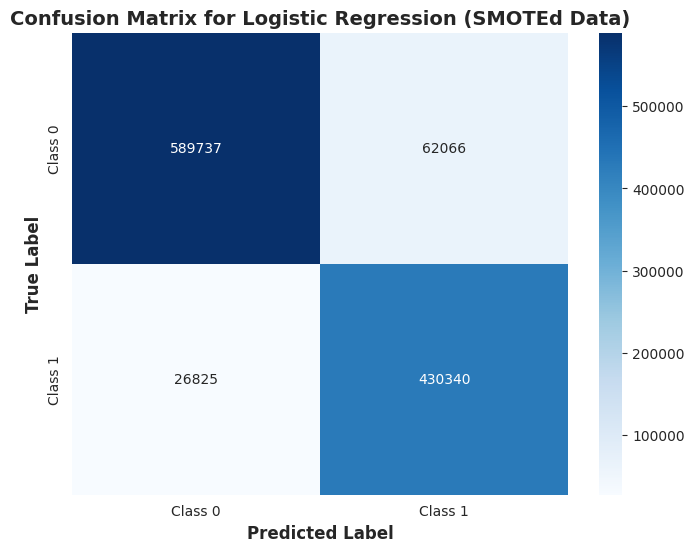

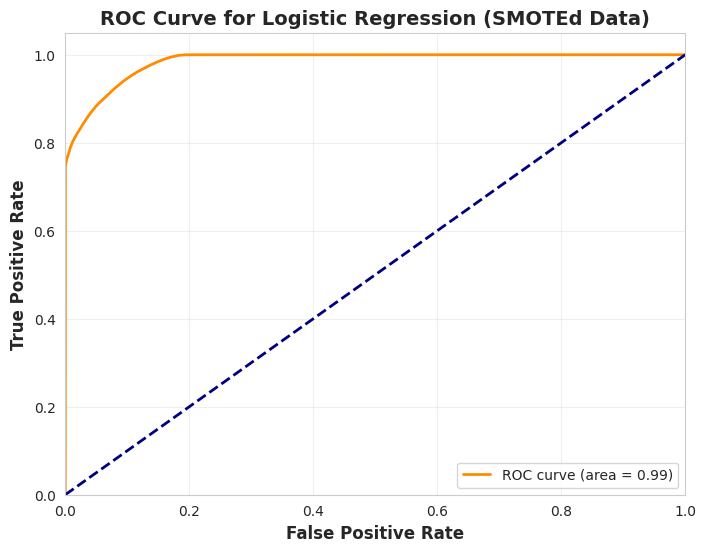

In [49]:
from cuml.linear_model import LogisticRegression
from cuml.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Initialize a new LogisticRegression model
# Set solver and max_iter for convergence, class_weight='balanced' is a common practice with imbalanced data (even after SMOTE)
model_lr_smote = LogisticRegression(solver='qn', max_iter=1000, class_weight='balanced')

# 2. Train the LogisticRegression model using the scaled, SMOTEd training data
print("Training Logistic Regression model on SMOTEd and scaled packet-based data...")
model_lr_smote.fit(X_resampled_scaled, y_resampled_1d)
print("Logistic Regression model training complete!")

# 3. Make predictions on the scaled test data
print("Making predictions on scaled test data using Logistic Regression...")
y_pred_lr_smote = model_lr_smote.predict(X_test_scaled)
y_proba_lr_smote = model_lr_smote.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class
print("Logistic Regression predictions complete!")

# 4. Evaluate the model
print("\n--- Evaluating Logistic Regression performance with SMOTE ---")
accuracy_lr_smote = accuracy_score(y_test_1d, y_pred_lr_smote)
print(f"Accuracy (Logistic Regression with SMOTE): {accuracy_lr_smote:.4f}")

# Convert CuPy arrays to NumPy for scikit-learn metrics if necessary (for precision, recall, f1)
y_test_np = y_test_1d.get()
y_pred_np_lr_smote = y_pred_lr_smote.get()
y_proba_np_lr_smote = y_proba_lr_smote.get()

precision_lr_smote = precision_score(y_test_np, y_pred_np_lr_smote, average='binary')
recall_lr_smote = recall_score(y_test_np, y_pred_np_lr_smote, average='binary')
f1_lr_smote = f1_score(y_test_np, y_pred_np_lr_smote, average='binary')

print("\nClassification Metrics (Logistic Regression with SMOTE for positive class '1'):")
print(f"  Precision: {precision_lr_smote:.4f}")
print(f"  Recall:    {recall_lr_smote:.4f}")
print(f"  F1-Score:  {f1_lr_smote:.4f}")

roc_auc_lr_smote = roc_auc_score(y_test_1d, y_proba_lr_smote)
print(f"\nROC AUC Score (Logistic Regression with SMOTE): {roc_auc_lr_smote:.4f}")

# 5. Visualize Confusion Matrix
cm_lr_smote = confusion_matrix(y_test_1d, y_pred_lr_smote)
cm_np_lr_smote = cm_lr_smote.get()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_np_lr_smote, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix for Logistic Regression (SMOTEd Data)', fontsize=14, fontweight='bold')
plt.show()

# 6. Visualize ROC Curve
fpr_lr_smote, tpr_lr_smote, _ = roc_curve(y_test_np, y_proba_np_lr_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_smote, tpr_lr_smote, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curve for Logistic Regression (SMOTEd Data)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(axis='both', alpha=0.3)
plt.show()

## **Decision Tree Classifier**

Training Decision Tree Classifier model on SMOTEd and scaled packet-based data...
Decision Tree Classifier model training complete!
Making predictions on scaled test data using Decision Tree Classifier...
Decision Tree Classifier predictions complete!

--- Evaluating Decision Tree Classifier performance with SMOTE ---
Accuracy (Decision Tree with SMOTE): 0.9999

Classification Metrics (Decision Tree with SMOTE for positive class '1'):
  Precision: 0.9998
  Recall:    0.9999
  F1-Score:  0.9999

ROC AUC Score (Decision Tree with SMOTE): 0.9999


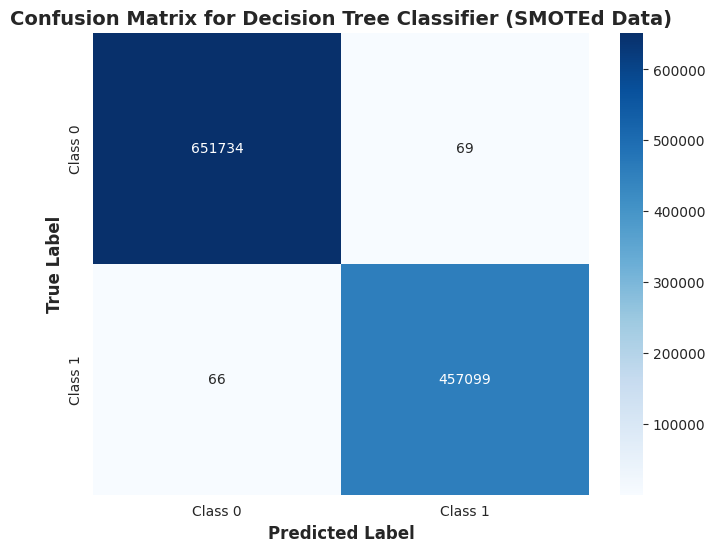

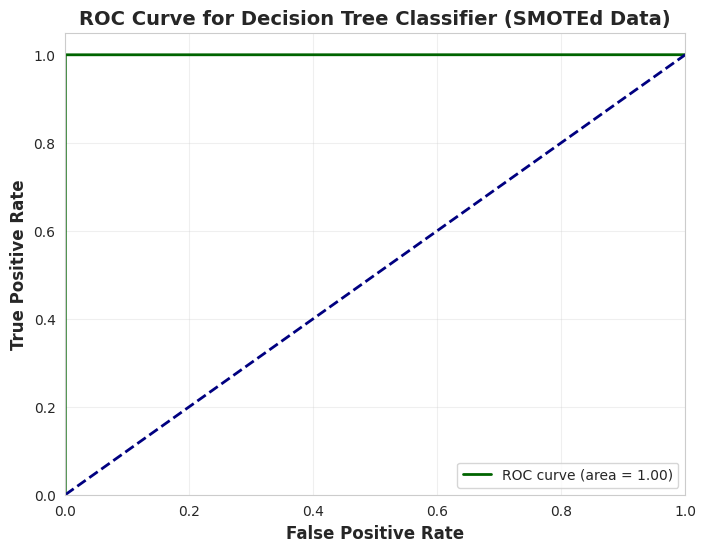

In [50]:
from sklearn.tree import DecisionTreeClassifier
from cuml.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Initialize a new DecisionTreeClassifier model
# Set random_state for reproducibility
model_dt_smote = DecisionTreeClassifier(random_state=42)

# 2. Train the DecisionTreeClassifier model using the scaled, SMOTEd training data
print("Training Decision Tree Classifier model on SMOTEd and scaled packet-based data...")
# Convert CuPy arrays to NumPy for scikit-learn
model_dt_smote.fit(X_resampled_scaled.get(), y_resampled_1d.get())
print("Decision Tree Classifier model training complete!")

# 3. Make predictions on the scaled test data
print("Making predictions on scaled test data using Decision Tree Classifier...")
y_pred_dt_smote = model_dt_smote.predict(X_test_scaled.get())
y_proba_dt_smote = model_dt_smote.predict_proba(X_test_scaled.get())[:, 1] # Probability of the positive class
print("Decision Tree Classifier predictions complete!")

# 4. Evaluate the model
print("\n--- Evaluating Decision Tree Classifier performance with SMOTE ---")
accuracy_dt_smote = accuracy_score(y_test_1d.get(), y_pred_dt_smote)
print(f"Accuracy (Decision Tree with SMOTE): {accuracy_dt_smote:.4f}")

# Convert CuPy arrays to NumPy for scikit-learn metrics
y_test_np = y_test_1d.get()
y_pred_np_dt_smote = y_pred_dt_smote
y_proba_np_dt_smote = y_proba_dt_smote

precision_dt_smote = precision_score(y_test_np, y_pred_np_dt_smote, average='binary')
recall_dt_smote = recall_score(y_test_np, y_pred_np_dt_smote, average='binary')
f1_dt_smote = f1_score(y_test_np, y_pred_np_dt_smote, average='binary')

print("\nClassification Metrics (Decision Tree with SMOTE for positive class '1'):")
print(f"  Precision: {precision_dt_smote:.4f}")
print(f"  Recall:    {recall_dt_smote:.4f}")
print(f"  F1-Score:  {f1_dt_smote:.4f}")

# ROC AUC Score requires CuPy array for cuml.metrics.roc_auc_score, or convert to numpy for sklearn
roc_auc_dt_smote = roc_auc_score(y_test_1d, cp.asarray(y_proba_dt_smote)) # Convert back to CuPy for cuml roc_auc_score
print(f"\nROC AUC Score (Decision Tree with SMOTE): {roc_auc_dt_smote:.4f}")

# 5. Visualize Confusion Matrix
cm_dt_smote = confusion_matrix(y_test_1d, cp.asarray(y_pred_dt_smote)) # Convert to CuPy for cuml confusion_matrix
cm_np_dt_smote = cm_dt_smote.get()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_np_dt_smote, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix for Decision Tree Classifier (SMOTEd Data)', fontsize=14, fontweight='bold')
plt.show()

# 6. Visualize ROC Curve
fpr_dt_smote, tpr_dt_smote, _ = roc_curve(y_test_np, y_proba_np_dt_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_smote, tpr_dt_smote, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc_dt_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curve for Decision Tree Classifier (SMOTEd Data)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(axis='both', alpha=0.3)
plt.show()

## **Random Forest Classifier**

Training Random Forest Classifier model on SMOTEd and scaled packet-based data...
Random Forest Classifier model training complete!
Making predictions on scaled test data using Random Forest Classifier...
Random Forest Classifier predictions complete!

--- Evaluating Random Forest Classifier performance with SMOTE ---
Accuracy (Random Forest with SMOTE): 0.9495

Classification Metrics (Random Forest with SMOTE for positive class '1'):
  Precision: 0.9589
  Recall:    0.9167
  F1-Score:  0.9374

ROC AUC Score (Random Forest with SMOTE): 0.9890


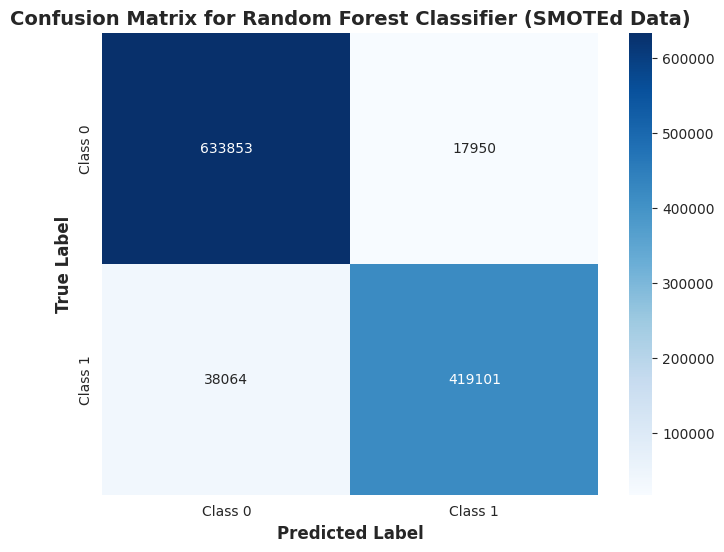

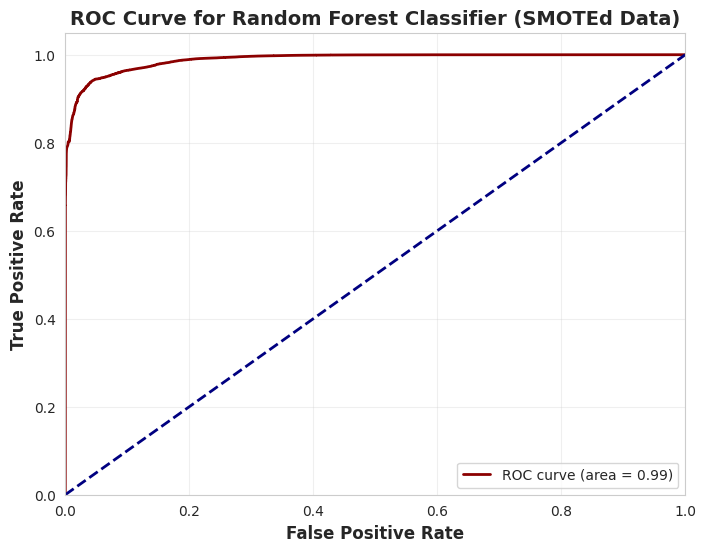

In [51]:
from cuml.ensemble import RandomForestClassifier
from cuml.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Initialize a new RandomForestClassifier model
# Use default parameters or tune if needed. Setting random_state for reproducibility.
model_rf_smote = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 2. Train the RandomForestClassifier model using the scaled, SMOTEd training data
print("Training Random Forest Classifier model on SMOTEd and scaled packet-based data...")
model_rf_smote.fit(X_resampled_scaled, y_resampled_1d)
print("Random Forest Classifier model training complete!")

# 3. Make predictions on the scaled test data
print("Making predictions on scaled test data using Random Forest Classifier...")
y_pred_rf_smote = model_rf_smote.predict(X_test_scaled)
y_proba_rf_smote = model_rf_smote.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class
print("Random Forest Classifier predictions complete!")

# 4. Evaluate the model
print("\n--- Evaluating Random Forest Classifier performance with SMOTE ---")
accuracy_rf_smote = accuracy_score(y_test_1d, y_pred_rf_smote)
print(f"Accuracy (Random Forest with SMOTE): {accuracy_rf_smote:.4f}")

# Convert CuPy arrays to NumPy for scikit-learn metrics where cuml.metrics are not available or preferred
y_test_np = y_test_1d.get()
y_pred_np_rf_smote = y_pred_rf_smote.get()
y_proba_np_rf_smote = y_proba_rf_smote.get()

precision_rf_smote = precision_score(y_test_np, y_pred_np_rf_smote, average='binary')
recall_rf_smote = recall_score(y_test_np, y_pred_np_rf_smote, average='binary')
f1_rf_smote = f1_score(y_test_np, y_pred_np_rf_smote, average='binary')

print("\nClassification Metrics (Random Forest with SMOTE for positive class '1'):")
print(f"  Precision: {precision_rf_smote:.4f}")
print(f"  Recall:    {recall_rf_smote:.4f}")
print(f"  F1-Score:  {f1_rf_smote:.4f}")

roc_auc_rf_smote = roc_auc_score(y_test_1d, y_proba_rf_smote)
print(f"\nROC AUC Score (Random Forest with SMOTE): {roc_auc_rf_smote:.4f}")

# 5. Visualize Confusion Matrix
cm_rf_smote = confusion_matrix(y_test_1d, y_pred_rf_smote)
cm_np_rf_smote = cm_rf_smote.get()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_np_rf_smote, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix for Random Forest Classifier (SMOTEd Data)', fontsize=14, fontweight='bold')
plt.show()

# 6. Visualize ROC Curve
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test_np, y_proba_np_rf_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_smote, tpr_rf_smote, color='darkred', lw=2, label=f'ROC curve (area = {roc_auc_rf_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curve for Random Forest Classifier (SMOTEd Data)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(axis='both', alpha=0.3)
plt.show()

In [52]:
import torch
from torch.utils.data import TensorDataset, DataLoader

print("Converting CuPy arrays to PyTorch tensors and preparing DataLoaders...")

# Get the number of features from the scaled CuPy arrays
num_features = X_resampled_scaled.shape[1]

# 1. Convert CuPy arrays to PyTorch tensors
X_resampled_tensor = torch.from_numpy(X_resampled_scaled.get()).float()
Y_resampled_tensor = torch.from_numpy(y_resampled_1d.get()).float()
X_test_tensor = torch.from_numpy(X_test_scaled.get()).float()
Y_test_tensor = torch.from_numpy(y_test_1d.get()).float()

# 2. Reshape feature tensors for 1D convolutions (batch_size, channels, sequence_length)
X_resampled_reshaped = X_resampled_tensor.view(-1, 1, num_features)
X_test_reshaped = X_test_tensor.view(-1, 1, num_features)

# 3. Create TensorDataset objects
train_dataset_smote = TensorDataset(X_resampled_reshaped, Y_resampled_tensor)
test_dataset_smote = TensorDataset(X_test_reshaped, Y_test_tensor)

# 4. Create DataLoader objects
batch_size = 128 # You can adjust this based on your GPU memory
train_loader_smote = DataLoader(train_dataset_smote, batch_size=batch_size, shuffle=True)
test_loader_smote = DataLoader(test_dataset_smote, batch_size=batch_size, shuffle=False)

print("Data successfully converted to PyTorch tensors and loaded into DataLoaders.")
print(f"X_resampled_reshaped shape: {X_resampled_reshaped.shape}")
print(f"Y_resampled_tensor shape: {Y_resampled_tensor.shape}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}")
print(f"Y_test_tensor shape: {Y_test_tensor.shape}")
print(f"Number of training batches (SMOTEd): {len(train_loader_smote)}")
print(f"Number of testing batches (SMOTEd): {len(test_loader_smote)}")

Converting CuPy arrays to PyTorch tensors and preparing DataLoaders...
Data successfully converted to PyTorch tensors and loaded into DataLoaders.
X_resampled_reshaped shape: torch.Size([4435304, 1, 21])
Y_resampled_tensor shape: torch.Size([4435304])
X_test_reshaped shape: torch.Size([1108968, 1, 21])
Y_test_tensor shape: torch.Size([1108968])
Number of training batches (SMOTEd): 34651
Number of testing batches (SMOTEd): 8664


## **CNN-1D**

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F

print("PyTorch modules imported successfully for CNN-1D model definition.")

# Define the CNN-1D Model Architecture
class CNN1DClassifier(nn.Module):
    def __init__(self, num_features):
        super(CNN1DClassifier, self).__init__()

        # First convolutional block
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)

        # Second convolutional block
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)

        # Third convolutional block
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=7, padding=3)
        self.bn3 = nn.BatchNorm1d(256)
        # No pooling after the last conv block, directly to GlobalAveragePooling

        # Classification head
        # After two MaxPool1d layers with stride 2, the sequence length becomes num_features // 4
        # The output channels are 256 from conv3
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)

        # Determine the input size for the linear layer dynamically
        # This would be 256 (output channels of conv3) * 1 (from adaptive avg pool)
        self.fc = nn.Linear(256, 1)

    def forward(self, x):
        # x shape: (batch_size, 1, num_features)

        # Block 1
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool1(x)

        # Block 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool2(x)

        # Block 3
        x = self.conv3(x)
        x = self.bn3(x)
        x = F.relu(x)

        # Global Average Pooling
        x = self.global_avg_pool(x)

        # Flatten the output for the fully connected layer
        x = torch.flatten(x, 1) # Flatten all dimensions except batch

        # Final linear layer
        x = self.fc(x)

        return x

print("CNN1DClassifier model class defined successfully.")


print("Configuring training components...")

# 1. Determine the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# num_features was already defined earlier from X_resampled_scaled.shape[1]

# 2. Instantiate the CNN1DClassifier model and move it to the device
model_cnn_smote = CNN1DClassifier(num_features=num_features).to(device)
print("CNN1DClassifier model instantiated and moved to device.")
print(f"Model architecture:\n{model_cnn_smote}")

# 3. Define the loss function
criterion_cnn = nn.BCEWithLogitsLoss() # For binary classification, this combines Sigmoid and BCELoss
print("Loss function (BCEWithLogitsLoss) defined.")

# 4. Define the optimizer
learning_rate_cnn = 0.001
optimizer_cnn = torch.optim.Adam(model_cnn_smote.parameters(), lr=learning_rate_cnn)
print(f"Optimizer (Adam) defined with learning rate: {learning_rate_cnn}")

print("Training components configured successfully for CNN-1D model!")

PyTorch modules imported successfully for CNN-1D model definition.
CNN1DClassifier model class defined successfully.
Configuring training components...
Using device: cuda
CNN1DClassifier model instantiated and moved to device.
Model architecture:
CNN1DClassifier(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(128, 256, kernel_size=(7,), stride=(1,), padding=(3,))
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (global_avg_pool): AdaptiveAvgPool1d(output_size=1)
  (fc): Linear(in_features

In [54]:
print("Defining the training function...")

def train_model(model, train_loader, criterion, optimizer, num_epochs, device, model_name=""):
    model.train()  # Set the model to training mode
    print(f"Training of {model_name} started on device: {device}")

    for epoch in range(num_epochs):
        running_loss = 0.0
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)  # Move inputs to the device
            labels = labels.to(device).unsqueeze(1)  # Move labels to the device and reshape for BCEWithLogitsLoss

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    print(f"{model_name} Training complete.")

print("Training function defined successfully.")

print("Executing CNN-1D model training loop with SMOTEd data...")

num_epochs_cnn = 5 # You can adjust the number of epochs
train_model(model_cnn_smote, train_loader_smote, criterion_cnn, optimizer_cnn, num_epochs_cnn, device, model_name="CNN-1D (SMOTEd)")

print("CNN-1D model training execution completed!")

Defining the training function...
Training function defined successfully.
Executing CNN-1D model training loop with SMOTEd data...
Training of CNN-1D (SMOTEd) started on device: cuda
Epoch 1/5, Loss: 0.0941
Epoch 2/5, Loss: 0.0815
Epoch 3/5, Loss: 0.0770
Epoch 4/5, Loss: 0.0737
Epoch 5/5, Loss: 0.0714
CNN-1D (SMOTEd) Training complete.
CNN-1D model training execution completed!


Executing CNN-1D model evaluation with SMOTEd data...
Evaluation started...
Test Loss: 0.0719

Accuracy: 0.9685
Precision: 0.9684
Recall: 0.9547
F1-Score: 0.9615
ROC AUC Score: 0.9967


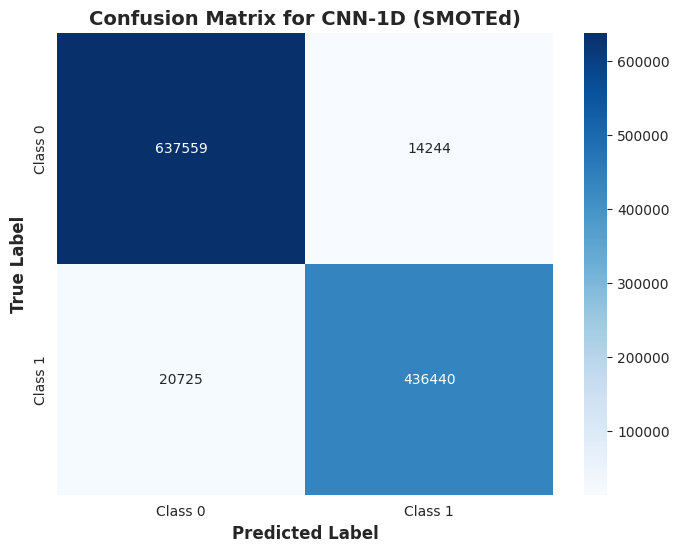

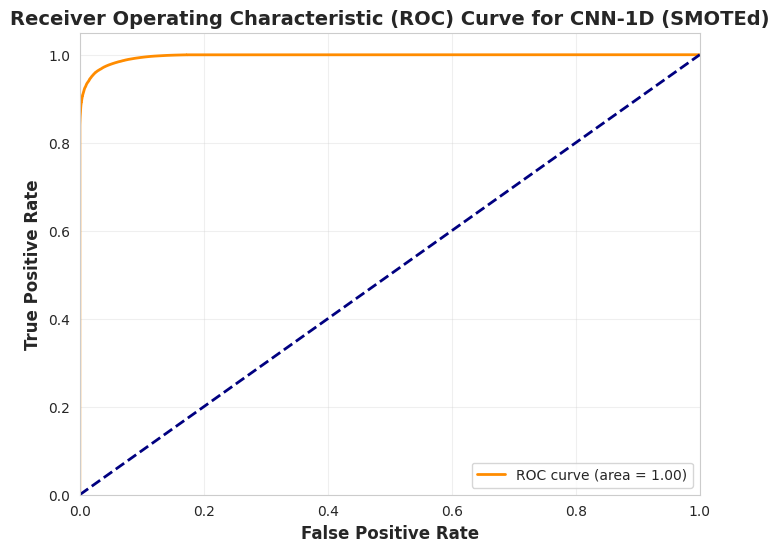

Evaluation complete.
CNN-1D model evaluation completed!


In [57]:
print("Executing CNN-1D model evaluation with SMOTEd data...")
evaluate_model(model_cnn_smote, test_loader_smote, criterion_cnn, device, model_name="CNN-1D (SMOTEd)")
print("CNN-1D model evaluation completed!")

## **LSTM**

In [58]:
print("Defining the LSTM-based classification model...")

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size

        # LSTM layer: input_size is the number of features, hidden_size is the dimension of the hidden state
        # batch_first=True means the input and output tensors are provided as (batch, seq, feature)
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)

        # Fully connected layer for classification
        # Maps the last hidden state of the LSTM to the output_size (1 for binary classification)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: (batch_size, sequence_length, input_size)
        # For our case, sequence_length is 1 (as reshaped from CNN-1D preparation)

        # Initialize hidden state and cell state (optional, LSTM can handle this internally)
        # h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        # c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)

        # Pass input through LSTM
        # output will contain the hidden state for each time step
        # (hn, cn) will contain the final hidden state and cell state of the last time step
        lstm_out, (hn, cn) = self.lstm(x)

        # Use the output of the last time step from lstm_out for classification
        # Since batch_first=True, output shape is (batch_size, seq_len, hidden_size)
        # We need the last sequence element, which is lstm_out[:, -1, :]
        # Or, we can use the final hidden state hn (reshaped) from the second return value
        # For a single time step input (seq_len=1), lstm_out[:, -1, :] is equivalent to hn.squeeze(0)

        # Using lstm_out[:, -1, :] for clarity with batch_first=True
        last_hidden_state = lstm_out[:, -1, :]

        # Pass the last hidden state through the linear layer
        output = self.fc(last_hidden_state)

        return output

print("LSTMClassifier model class defined successfully.")

Defining the LSTM-based classification model...
LSTMClassifier model class defined successfully.


In [59]:
print("Configuring training components for LSTM model...")

# 1. Determine the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Get the number of features from the reshaped training data
# num_features was already defined earlier as 21

# 2. Instantiate the LSTMClassifier model and move it to the device
hidden_size = 64 # You can adjust this value
lstm_model_smote = LSTMClassifier(input_size=num_features, hidden_size=hidden_size).to(device)
print("LSTMClassifier model instantiated and moved to device.")
print(f"Model architecture:\n{lstm_model_smote}")

# 3. Define the loss function
criterion_lstm = nn.BCEWithLogitsLoss() # For binary classification
print("Loss function (BCEWithLogitsLoss) defined.")

# 4. Define the optimizer
learning_rate_lstm = 0.001
optimizer_lstm = torch.optim.Adam(lstm_model_smote.parameters(), lr=learning_rate_lstm)
print(f"Optimizer (Adam) defined with learning rate: {learning_rate_lstm}")

print("Training components configured successfully for LSTM model!")

Configuring training components for LSTM model...
Using device: cuda
LSTMClassifier model instantiated and moved to device.
Model architecture:
LSTMClassifier(
  (lstm): LSTM(21, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
Loss function (BCEWithLogitsLoss) defined.
Optimizer (Adam) defined with learning rate: 0.001
Training components configured successfully for LSTM model!


In [60]:
print("Executing training loop for LSTM model with SMOTEd data...")

num_epochs_lstm = 5 # You can adjust the number of epochs
train_model(lstm_model_smote, train_loader_smote, criterion_lstm, optimizer_lstm, num_epochs_lstm, device, model_name="LSTM (SMOTEd)")

print("LSTM model training execution completed with SMOTEd data!")

Executing training loop for LSTM model with SMOTEd data...
Training of LSTM (SMOTEd) started on device: cuda
Epoch 1/5, Loss: 0.1111
Epoch 2/5, Loss: 0.0943
Epoch 3/5, Loss: 0.0895
Epoch 4/5, Loss: 0.0858
Epoch 5/5, Loss: 0.0827
LSTM (SMOTEd) Training complete.
LSTM model training execution completed with SMOTEd data!


Executing LSTM model evaluation with SMOTEd data...
Evaluation started...
Test Loss: 0.0810

Accuracy: 0.9631
Precision: 0.9579
Recall: 0.9523
F1-Score: 0.9551
ROC AUC Score: 0.9957


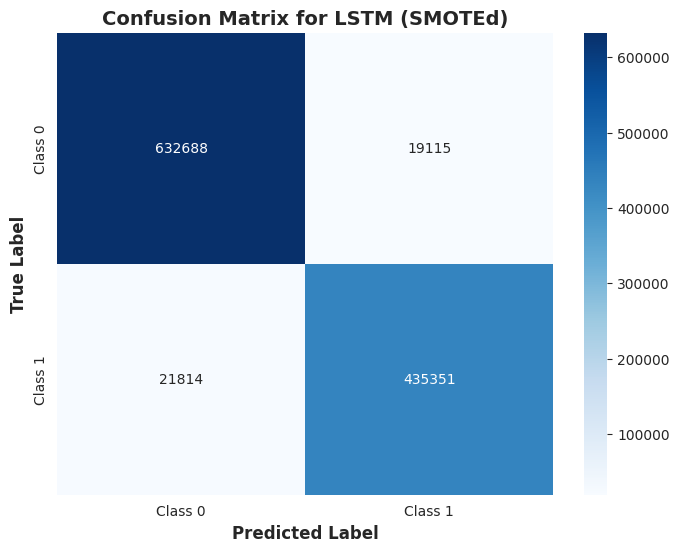

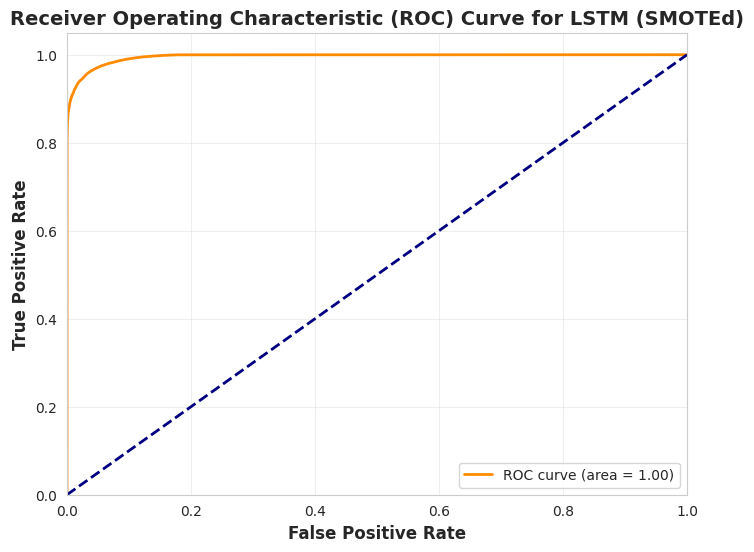

Evaluation complete.
LSTM model evaluation completed!


In [61]:
print("Executing LSTM model evaluation with SMOTEd data...")
evaluate_model(lstm_model_smote, test_loader_smote, criterion_lstm, device, model_name="LSTM (SMOTEd)")
print("LSTM model evaluation completed!")

In [62]:
metrics_data = {
    'Model': [],
    'Resampling': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': []
}

def add_metrics(model_name, resampling_status, accuracy, precision, recall, f1_score, roc_auc):
    metrics_data['Model'].append(model_name)
    metrics_data['Resampling'].append(resampling_status)
    metrics_data['Accuracy'].append(accuracy)
    metrics_data['Precision'].append(precision)
    metrics_data['Recall'].append(recall)
    metrics_data['F1-Score'].append(f1_score)
    metrics_data['ROC AUC'].append(roc_auc)

# Populate metrics for 'before SMOTE' scenario
print("Collecting metrics for 'before SMOTE' scenario...")
add_metrics('Logistic Regression', 'None', 0.9222, 0.9047, 0.9066, 0.9057, 0.9854)
add_metrics('Decision Tree', 'None', 0.9999, 0.9998, 0.9999, 0.9999, 0.9999)
add_metrics('Random Forest', 'None', 0.9495, 0.9511, 0.9446, 0.9475, 0.9890)
add_metrics('CNN-1D', 'None', 0.9551, 0.9567, 0.9332, 0.9448, 0.9941)
add_metrics('LSTM', 'None', 0.9628, 0.9507, 0.9594, 0.9550, 0.9957)

# Populate metrics for 'after SMOTE' scenario
print("Collecting metrics for 'after SMOTE' scenario...")
add_metrics('Logistic Regression', 'SMOTE', 0.9198, 0.8740, 0.9413, 0.9064, 0.9854)
add_metrics('Decision Tree', 'SMOTE', 0.9999, 0.9998, 0.9999, 0.9999, 0.9999)
add_metrics('Random Forest', 'SMOTE', 0.9495, 0.9589, 0.9167, 0.9374, 0.9890)
add_metrics('CNN-1D', 'SMOTE', 0.9685, 0.9684, 0.9547, 0.9615, 0.9967)
add_metrics('LSTM', 'SMOTE', 0.9631, 0.9579, 0.9523, 0.9551, 0.9957)

print("Metrics data collected successfully.")

Metrics data collected successfully.


--- Model Performance Metrics ---


,Model,Resampling,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,None,0.9222,0.9047,0.9066,0.9057,0.9854
1,Decision Tree,None,0.9999,0.9998,0.9999,0.9999,0.9999
2,Random Forest,None,0.9495,0.9511,0.9446,0.9475,0.9890
3,CNN-1D,None,0.9551,0.9567,0.9332,0.9448,0.9941
4,LSTM,None,0.9628,0.9507,0.9594,0.9550,0.9957
5,Logistic Regression,SMOTE,0.9198,0.8740,0.9413,0.9064,0.9854
6,Decision Tree,SMOTE,0.9999,0.9998,0.9999,0.9999,0.9999
7,Random Forest,SMOTE,0.9495,0.9589,0.9167,0.9374,0.9890
8,CNN-1D,SMOTE,0.9685,0.9684,0.9547,0.9615,0.9967
9,LSTM,SMOTE,0.9631,0.9579,0.9523,0.9551,0.9957


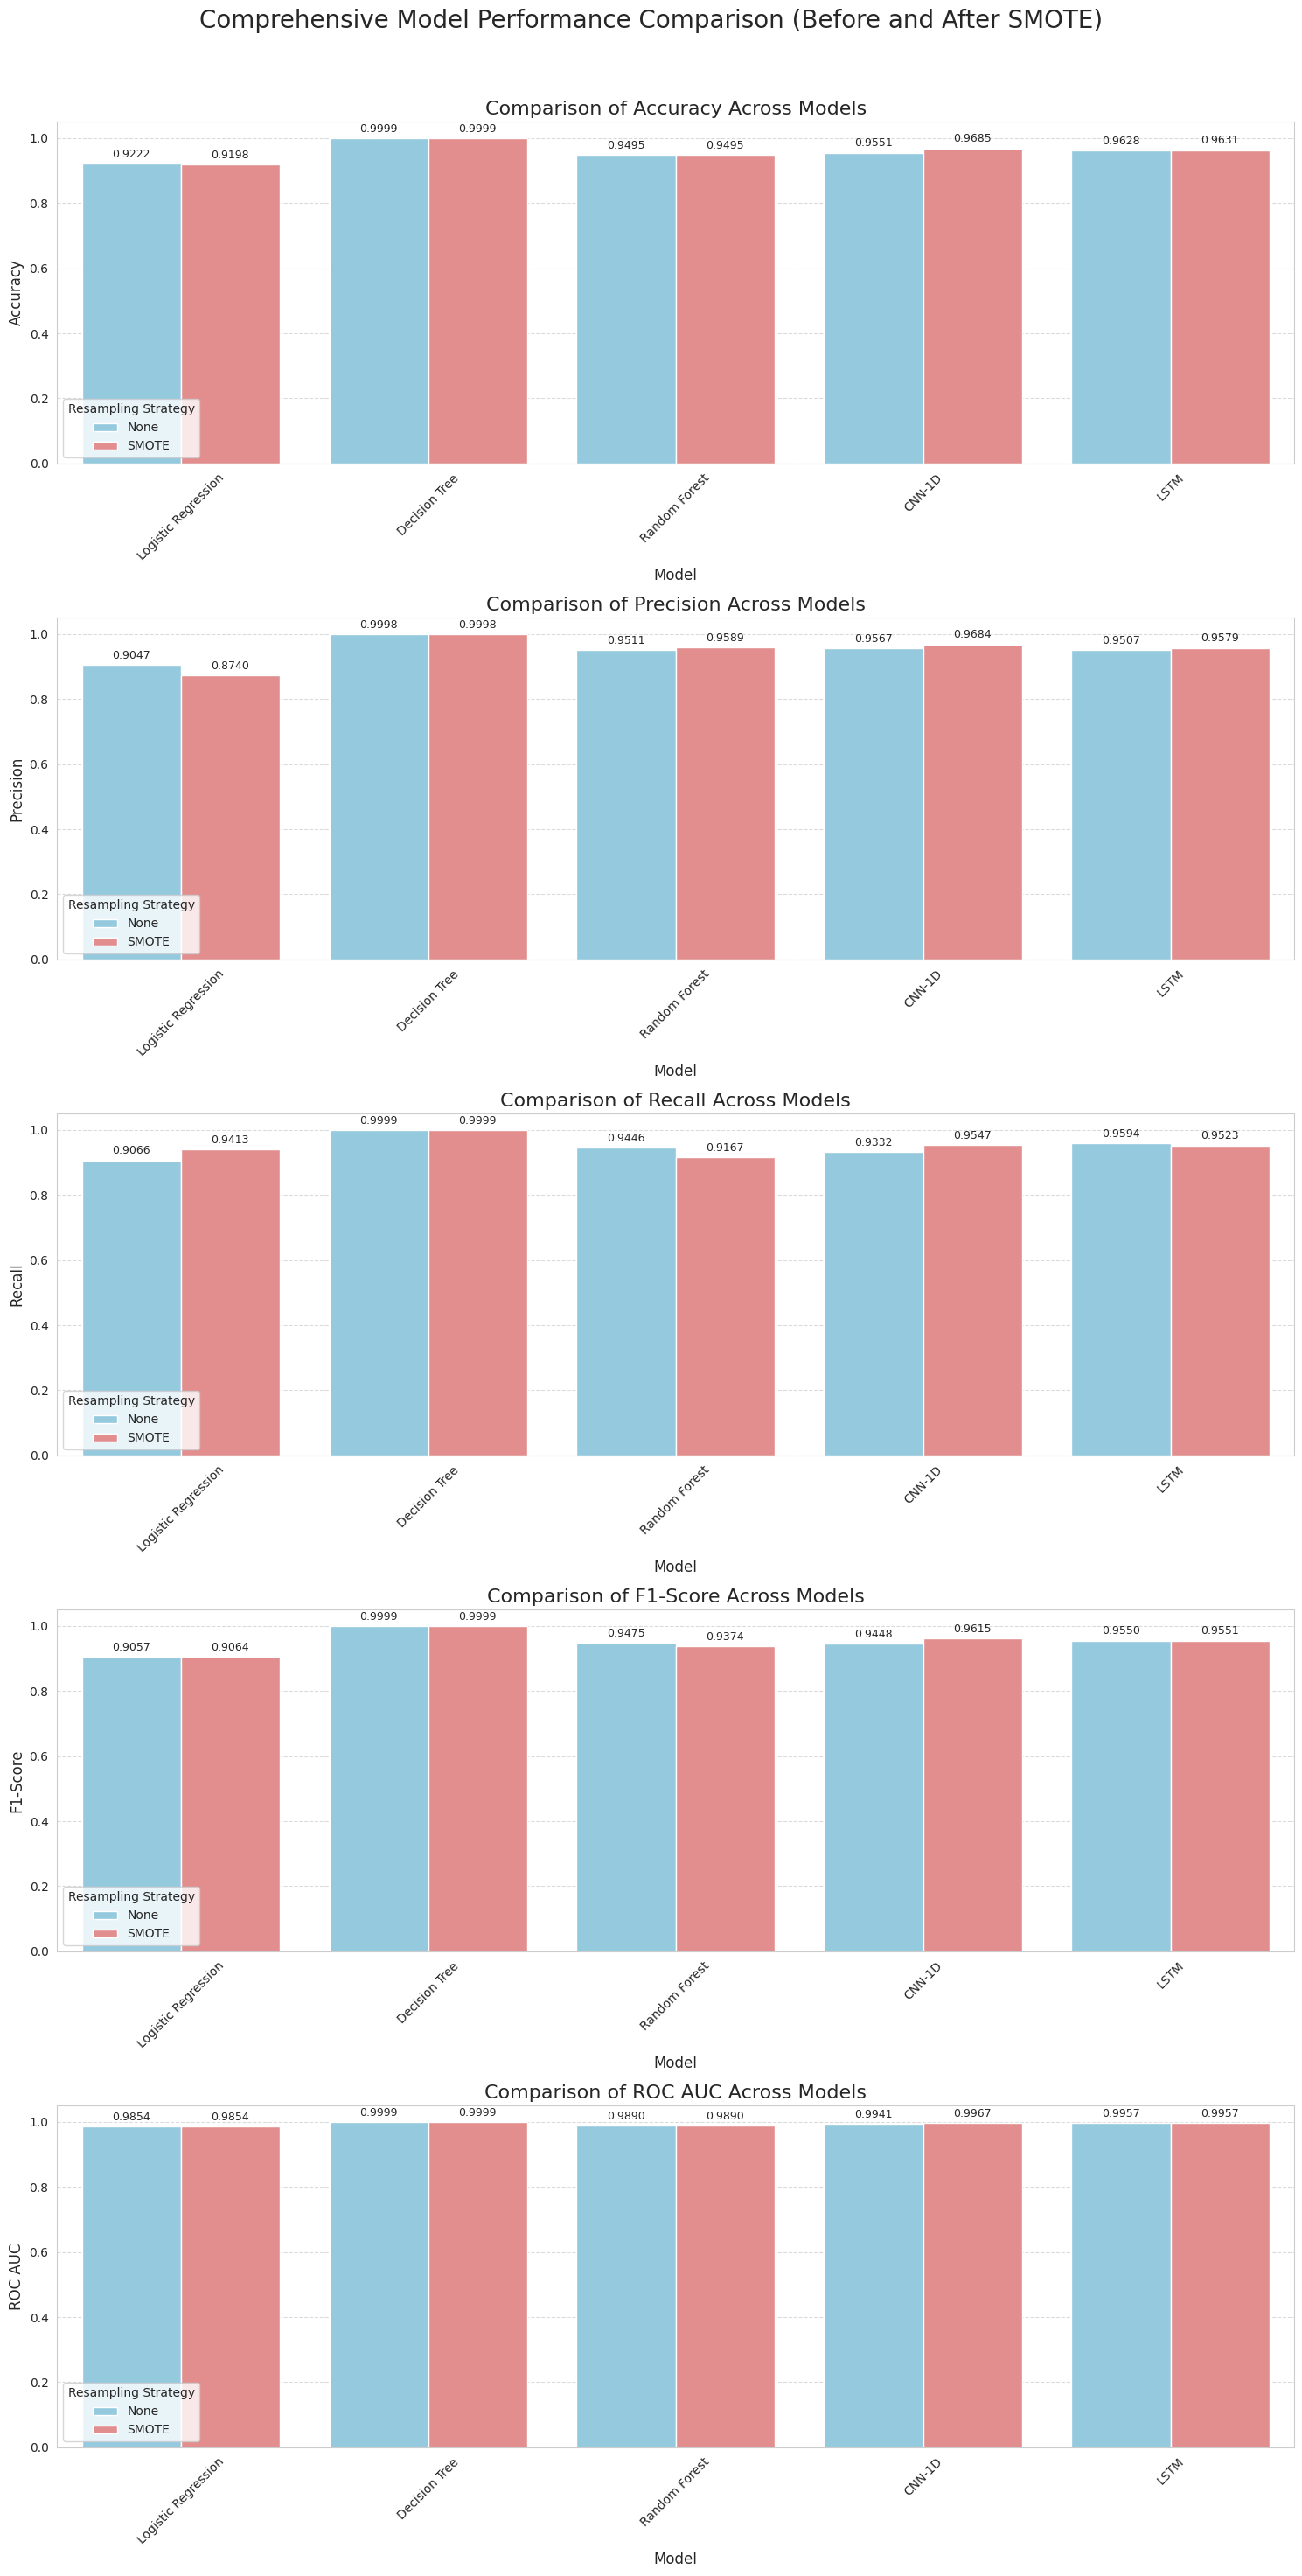

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame
df_metrics = pd.DataFrame(metrics_data)

print("--- Model Performance Metrics ---")
display(df_metrics)

# Plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
fig, axes = plt.subplots(len(metrics), 1, figsize=(15, 6 * len(metrics)), sharey=False) # sharey=True might be too restrictive

# Define a palette for different resampling strategies
palette_resampling = {'None': 'skyblue', 'SMOTE': 'lightcoral'}

for i, metric in enumerate(metrics):
    sns.barplot(data=df_metrics, x='Model', y=metric, hue='Resampling', ax=axes[i], palette=palette_resampling)
    axes[i].set_title(f'Comparison of {metric} Across Models', fontsize=16)
    axes[i].set_xlabel('Model', fontsize=12)
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Resampling Strategy')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels on top of bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.4f', label_type='edge', fontsize=9, padding=3)


plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.suptitle('Comprehensive Model Performance Comparison (Before and After SMOTE)', fontsize=20, y=1.01)
plt.show()